# Predicting Heart Attack Outcomes

## Table Of Contents

### [1. Introduction](#Introduction)
   - [1.1 Description of the Goal](#Description_of_the_goal)
   - [1.2 Reading in the Dataset](#Reading_in_the_dataset)
   - [1.3 Strategy](#Strategy)
    
### [2. Cleaning the Data](#Cleaning_the_data)
   - [2.1 Renaming Columns](#Renaming_columns)
   - [2.2 Deciding on the Target](#Deciding_on_the_target)
       - [2.2.1 Exploratory Visualization](#Exploratory_visualization)
   - [2.3 General Formatting](#General_formatting)
   - [2.4 Removing Columns With Only 1 Unique Value](#Removing_columns_with_only_1_unique_value)
    
### [3. Feature Preparation](#Feature_preparation)
   - [3.1 Addressing Missing Values](#Addressing_missing_values)
       - [3.1.1 Understanding Remaining Missing Values](#Understanding_remaining_missing_values)
       - [3.1.2 Visualizing Patterns With Seaborn](#Visualizing_patterns_with_seaborn)
       - [3.1.3 Imputation](#Imputation)
   - [3.2 Feature Engineering](#Feature_engineering)
       - [3.2.1 Separating Into Categorical, Numerical, and Admissions-only Features](#Separating_into_categorical,_numerical,_and_admissions-only_features)
       - [3.2.2 Creation of New Columns](#Creation_of_new_columns)
           - [3.2.2.1 Categorical One-Hot Encoding](#Categorical_one-hot_encoding)
           - [3.2.2.2 Real Binning](#Real_binning)
           - [3.2.2.3 Real One-Hot Encoding](#Real_one-hot_encoding)
           - [3.2.2.4 Admissions One-Hot Encoding](#Admissions_one-hot_encoding)
       - [3.2.3 Combining Categorical and Real Data](#Combining_categorical_and_real_data)
   - [3.3 Feature Selection](#Feature_selection)
       - [3.3.1 Day Three Feature Selection](#Day_three_feature_selection)
       - [3.3.2 Admission Feature Selection](#Admission_feature_selection)
       - [3.3.3 Optional Chi Squared testing](#Optional_chi_squared_testing)

### [4. Modelling](#Modelling)
   - [4.1 Preliminary Linear Regression](#Preliminary_linear_regression)
   - [4.2 Nonlinear Regression](#Nonlinear_regression)
   - [4.3 Model Selection and Hyperparameter Tuning](#Model_selection_and_hyperparameter_tuning)
   - [4.4 Visualizing the Best-Performing Models](#Visualizing_the_best-performing_models)
   
### [5. Conclusion](#Conclusion)



<a id='Introduction'></a>

# 1. Introduction

<a id="Description_of_the_goal"></a>

## 1.1 Description of the Goal

Welcome to this notebook! Our goal is to accurately predict what will happen to someone who has been hospitalized from having a heart attack. 

As noted in the dataset's description, the prediction of complications from myocardial infarction (heart attack) is both historically challenging and important. Specialists can struggle to accurately predict the development and severity of these complications, leading to worse health, or even death. If we could understand more about the relationships between past patients and the outcomes of their heart attacks, then in theory we could make medical decisions for new patients that anticipate, and hopefully avoid, future suffering. 

The dataset we'll be working with was created by individuals from the Krasnoyarsk State Medical University in Russia, and University of Leicester in England. 

It's worth noting that the patients in this dataset are not a representative sample of the global population, but a 1700-person large sample from 1992-1995 from one location. If we had data about other demographics at other times, we may have a more generalized understanding of heart attack outcomes, but we can still continue with this distinction in mind. 

The full dataset and dataset description retrieved from the UCI Machine Learning Repository can be found [here](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications).

<a id="Reading_in_the_dataset"></a>

## 1.2 Reading in the Dataset

To begin, we'll import the main libraries we'll use for our analysis, along with the dataset itself. Once we've converted this from a .csv file into a dataframe object using the pandas library, we'll see the first five rows of the dataset to get an initial look at our starting data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option("display.max_columns", None)


In [2]:
data = pd.read_csv('MI.data', index_col=None, header=None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123
0,1,77,1,2,1,1,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,180,100,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,4.7,0,138,?,?,?,8,16,4,0,0,1,?,?,?,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,55,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,?,?,120,90,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.38,0.18,?,7.8,3,2,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,3,52,1,0,0,0,2,?,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,100,180,100,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,132,0.3,0.11,?,10.8,?,3,3,0,0,1,1,1,0,1,0,0,3,2,2,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,68,0,0,0,0,2,?,2,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,?,?,120,70,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.9,0,146,0.75,0.37,?,?,?,2,0,0,1,?,?,?,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5,60,1,0,0,0,2,?,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,190,100,160,90,0,0,0,0,0,0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.5,0,132,0.45,0.22,?,8.3,?,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 124 columns):
 #    Column  Dtype 
---   ------  ----- 
 0    0       int64 
 1    1       object
 2    2       int64 
 3    3       object
 4    4       object
 5    5       object
 6    6       object
 7    7       object
 8    8       object
 9    9       object
 10   10      object
 11   11      object
 12   12      object
 13   13      object
 14   14      object
 15   15      object
 16   16      object
 17   17      object
 18   18      object
 19   19      object
 20   20      object
 21   21      object
 22   22      object
 23   23      object
 24   24      object
 25   25      object
 26   26      object
 27   27      object
 28   28      object
 29   29      object
 30   30      object
 31   31      object
 32   32      object
 33   33      object
 34   34      object
 35   35      object
 36   36      object
 37   37      object
 38   38      object
 39   39      object
 40   40  

In [5]:
print('Number of rows:', data.shape[0])
print('Number of columns:', data.shape[1])

Number of rows: 1700
Number of columns: 124


<a id="Strategy"></a>

## 1.3 Strategy

Looking at the big picture view, there are three major categories of work we'll focus on in order to succesfully understand and predict information based on this dataset. 

__1. Cleaning the Data__: This involves foundational tasks like formatting the data and determining the exact question we'd like to answer. Here we can also create some visual representations to help us understand the numbers behind this question.
    
    
__2. Feature Preparation__: This is the bridge between our formatted data and the modelling process. We'll cover a lot of ground here, including dealing with missing values, creating new features, and using correlations to identify features to use as inputs for our models. 


__3. Modelling__: This is the fun part! We'll build multiple models using different algorithms that predict outcomes based on the features we've selected. In this section, we'll not only go through the optimized selection of these models, but we'll also discover the optimal parameters for each one. Finally, determining the success based on various error metrics and visually identifying how well the model performs on unseen data will give us confidence for using this in real life.




<a id='Cleaning_the_data'></a>

# 2. Cleaning the Data

Let's get started! We'll begin the data cleaning process here. To do this, there are 4 steps we'll take:

1. Rename the columns 
2. Decide on target for modeling 
3. General formatting 
4. Remove columns with only 1 unique value


<a id='Renaming_columns'></a>

## 2.1 Renaming Columns

Currently, each column is numbered from 0 to 123. It would be nicer to work with this data if we knew what each column represented. 

We'll consult the data description from the link above to manually create concise but descriptive column names for each column in the dataset. Then, we'll replace the current nondescriptive numbers with these names.

In [6]:
renamed = [
     'ID', 'Age', 'Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'heredity_on_CHD', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg',
     'diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'serum_potassium_content', 'increase_of_sodium_in_serum',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'serum_CPK_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate', 'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_opioid_drugs_by_emergency_cardiology_team', 'use_of_NSAIDs_by_emergency_cardiology_team', 'use_of_lidocaine_by_emergency_cardiology_team', 'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
     'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 'myocardial_rupture', 'dressler_syndrome', 
     'chronic_heart_failure', 'relapse_of_MI', 'post_infarction_angina', 'lethal_outcome'
]

In [7]:
new_col_names_dict = {}
for i, j in zip(data.columns, renamed):
    new_col_names_dict[i] = j


In [8]:
data = data.rename(columns = new_col_names_dict)

In [9]:
data.head()

,ID,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,heredity_on_CHD,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,diastolic_blood_pressure_by_emergency_cardiology_team_in_mmHg,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,serum_CPK_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU

<a id='Deciding_on_the_target'></a>

## 2.2 Deciding on the Target

Generally speaking, we want to determine the likelihood of complications and outcomes for a given patient.

Columns 113 to 123 provide true or false responses for whether a given complication exists for that patient.
column 124, lethal outcome, provides 7 causes of death (and one additional category for survival). This gives us 11 complications, 7 causes of death, and 1 scenario in which the patient survives. 

Because there are 19 potential targets, we have a few options. We can:
1. predict survival vs. any cause of death
2. predict the number of any complications
3. predict each specific cause of death as its own target
4. predict each specific complication as its own target

Options 1 and 3 deal exclusively with survival and causes of death, while options 2 and 4 deal with complications. The thrust of this dataset's creators seems to be to use patient information to better predict complications, not just whether the patient will die. So, while interesting and potentially useful in another setting, let's eliminate options 1 and 3 for the scope of this project. 

__Let's focus on number 2: predicting how many complications a patient will experience.__ This will be more broadly focused than the specific complications option, but it will likely turn up useful information nonetheless that could help guide a physician to certain care strategies over others. Additionally, we would likely need more data available to analyze the problem with the level of granularity contained in option 4. Because the most benefit will be gained by combining patient information with the prediction of any complication in their future, this will be our target for this project.  

To do this, we'll group all possible complications together as a new column in the dataframe which we'll call "target". 

Because we want to determine the number of complications, we'll frame this as a regression problem, rather than a classification problem. We're predicting the integer values of complications, not assigning labels to the values (as we would if instead we were looking at the likelihood of complications vs no complications). That said, this is a bit of a flexible scenario, where you could argue that the "classes" are those same integer values. For the sake of determining how many complications a patient may experience, we'll move forward with regression. (get the joke? moving forward with regression? :) )


A secondary goal we can pursue is to predict the number of complications for a patient based on two different times. One time would be if they've just been admitted to the hospital, and the other woud be if they've been there for three days. Having this prediction available at different treatment stages may prove useful in a real setting. 


In [10]:
target_columns = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina' 
    ]

In [11]:
data['target'] = data[target_columns].sum(axis=1)

In [12]:
new_targets = [
    'atrial_fibrillation', 'supraventricular_tachycardia', 'ventricular_tachycardia',
    'ventricular_fibrillation', 'third_degree_AV_block', 'pulmonary_edema', 
    'myocardial_rupture', 'dressler_syndrome', 'chronic_heart_failure', 
    'relapse_of_MI', 'post_infarction_angina', 'target'
    ]

data[new_targets].head()

,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,relapse_of_MI,post_infarction_angina,target
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
data['target'].value_counts(normalize=True)

0    0.450000
1    0.375882
2    0.118235
3    0.043529
4    0.011176
5    0.001176
Name: target, dtype: float64

In [14]:
data['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

<a id='Exploratory_visualization'></a>

### 2.2.1 Exploratory Visualization 

Now that we've determined our target and have numerical representations, let's see what this information looks like visually. 

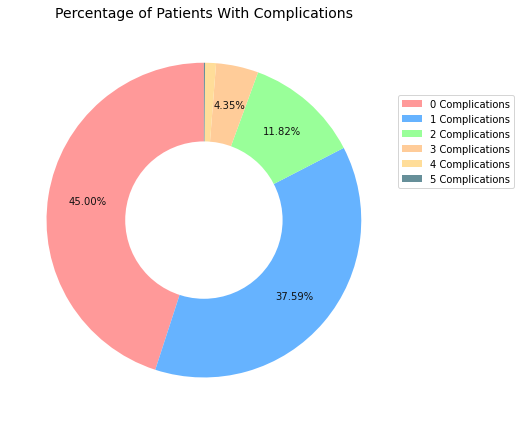

In [15]:
complication_series = data['target'].value_counts(normalize=True)
labels = complication_series.index

new_labels = []
for label in labels:
    if label <= 5:
        new_labels.append('{} {}'.format(label, 'Complications'))
    else:
        new_labels.append(label)

sizes = complication_series.values

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffdd99', '#668f99']


def autopct_modifier(limit):
    ''' Displays only values above a threshold on a given slice.
    '''
    def pie_autopct(pct):
        return ('{:.2f}%'.format(pct)) if pct > limit else ''
    return pie_autopct


fig = plt.subplots(figsize=(10, 6))

patches, texts, autotexts = plt.pie(
    sizes,
#     labels=new_labels,
    autopct=autopct_modifier(4),
    colors=colors,
    pctdistance=0.75,
    startangle=90,
    normalize=False
)

for text in texts:
    text.set_color('#333')
    
for autotext in autotexts:
    autotext.set_color('#111')
    

plt.title('Percentage of Patients With Complications', fontsize=14)
                                          
plt.legend(
        labels = new_labels, 
        loc='right', 
        bbox_to_anchor=(1.3, 0.7)
    )

center_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

    
plt.tight_layout()
plt.show()

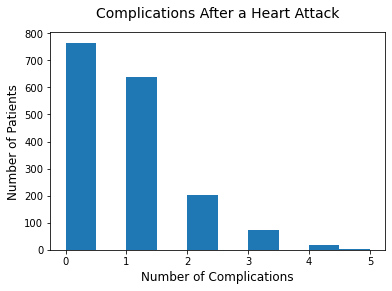

In [16]:
data['target'].plot.hist()
plt.title('Complications After a Heart Attack', y=1.04, fontsize=14)
plt.xticks(size=10)
plt.xlabel('Number of Complications', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.show()


We see that people had anywhere from 0 to 5 unique complications following their heart attack. 

Patients who have 0 or 1 complications are 82% of the total, perhaps indicating that the patient is likely to die before having a chance to accumulate multiple complications. 


<a id='General_formatting'></a>

## 2.3 General Formatting

There are a number of instances where the "?" symbol represents a missing value. However, "?" doesn't actually register to the programming language as missing, so it falsely appears as if there are no missing values.

This part is pretty straight-forward; we'll convert any "?" symbol into something that will register as a missing value. We'll replace them with NaN ("Not a Number"). 

In [17]:
data.isnull().sum()

ID                                                                 0
Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
heredity_on_CHD                                                    0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions

In [18]:
for col_name in data.columns:
    data[col_name] = data[col_name].replace('?', np.nan)

In [19]:
data.isnull().sum()

ID                                                                    0
Age                                                                   8
Sex                                                                   0
num_MI_in_anam                                                        4
exertional_angina_pectoris_in_anam                                  106
functional_class_of_angina_pectoris_in_last_year                     73
CHD_in_recent_weeks                                                  51
heredity_on_CHD                                                    1628
essential_hypertension                                                9
symptomatic_hypertension                                              8
duration_of_arterial_hypertension                                   248
chronic_heart_failure_in_anam                                        54
arrhythmia_in_anam                                                   21
premature_atrial_contractions_in_anam                           

<a id='Removing_columns_with_only_1_unique_value'></a>

## 2.4 Removing Columns With Only 1 Unique Value

It's good practice to disregard any columns that only have one unique value, as those would not help us in the modeling process. We can verify easily with this relatively small number of features that there are no columns that fall in this category. Furthermore, none of the columns that have only two unique values have one of those values as NaN. 

We're good to move forward, knowing at this stage that these columns are all potentially useful.

In [20]:
data.nunique(dropna=False)

ID                                                                 1700
Age                                                                  63
Sex                                                                   2
num_MI_in_anam                                                        5
exertional_angina_pectoris_in_anam                                    8
functional_class_of_angina_pectoris_in_last_year                      6
CHD_in_recent_weeks                                                   4
heredity_on_CHD                                                       3
essential_hypertension                                                5
symptomatic_hypertension                                              3
duration_of_arterial_hypertension                                     9
chronic_heart_failure_in_anam                                         6
arrhythmia_in_anam                                                    3
premature_atrial_contractions_in_anam                           

<a id='Feature_preparation'></a>

# 3. Feature Preparation 

Now that we've formatted the data properly, we can move onto feature preparation! There are three distinct steps we'll take to prepare the data for a machine learning model:


__1. Addressing Missing Values__

If there are any missing values in the dataset, the machine learning model will not be able to calculate its predictions. Therefore, we must address every single missing value in a way that is representative of the real life values that instance represents. In other words, we must remove data only where necessary, or replace a missing value with some other reasonable value. 

__2. Feature Engineering__

Next, we'll address the categorical data. This type of data (which makes up the majority of the values in this dataset) first needs be converted from an object into a numerical form. Then, we'll create new columns that represent each original value.

After that, we'll address the numerical data through the use of binning, followed by the same creation of new columns as above to represent each bin value as its own column. 

If there are any remaining unneccesary columns at this point, we'll remove them as well. 

__3. Feature Selection__ 

Finally, we'll perform feature selection, in which we use correlations between the available columns and our target to determine the most relevant relationships. We'll use these as the inputs to our machine learning models. 

<a id='Addressing_missing_values'></a>

## 3.1 Addressing Missing Values

We'll use two main techniques to address missing values:
   - removal of rows or columns
   - imputation (filling in missing values with some form of statistically useful approximation)
    
To help guide how we deal with missing columns, we can consider the following:
   - how many values are missing?
   - how many unique values are there in a column?
   - is the column useful for a machine learning model? If not, removal is a good choice. If so, removal of rows provided not too many, may be the way to go. 


    

We can remove the `ID` column immediately for two reasons. Firstly, it has a unique value for each patient, so it will be useless for drawing any correlations for machine learning. Secondly, the data description explicitly omitted it from the list of usable columns. 

In [21]:
removable_cols = ['ID']

To proceed broadly at first, let's start with an assumption that if a column has at least 55% of the values not missing, we'll keep those columns. Later, we'll address the remaining columns' missing rows.

In [22]:
missing_maximum = int(len(data) * 0.45)
missing_maximum

765

In [23]:
missings = data.isnull().sum()

df_55_plus = data[missings[missings.values < missing_maximum].index]

df_55_plus.isnull().sum()


ID                                                                   0
Age                                                                  8
Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxy

In [24]:
df_55_plus = df_55_plus.drop('ID', axis=1)

In [25]:
df_55_plus.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_opioid_drugs_by_emergency_cardiology_team,use_of_NSAIDs_by_emergency_cardiology_team,use_of_lidocaine_by_emergency_cardiology_team,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricula

In [26]:
print('Number of columns before elimination:', data.shape[1])
print('Number of columns after elimination:', df_55_plus.shape[1])


Number of columns before elimination: 125
Number of columns after elimination: 120


We've removed 5 columns so far. Let's look now at how we can systematically approach the remaining missing values.

<a id='Understanding_remaining_missing_values'></a>

## 3.1.1 Understanding Remaining Missing Values

All the remaining columns are potentially useful for the modelling process, so we should be looking at retaining as much of this information as we can. 

Let's first see what percentage of the values are missing in a given column, then see if we can identify any patterns in the data.

In [27]:
new_df = df_55_plus.copy()

In [28]:
pct_missing = 1 - new_df.count() / len(new_df)
pct_missing.sort_values(ascending=False)

use_of_NSAIDs_by_emergency_cardiology_team                         0.403529
use_of_lidocaine_by_emergency_cardiology_team                      0.398235
use_of_opioid_drugs_by_emergency_cardiology_team                   0.386471
serum_sodium_content                                               0.220588
increase_of_sodium_in_serum                                        0.220588
serum_potassium_content                                            0.218235
hypokalemia                                                        0.217059
serum_AsAT_content                                                 0.167647
serum_AlAT_content                                                 0.167059
diastolic_blood_pressure_by_ICU_in_mmHg                            0.157059
systolic_blood_pressure_by_ICU_in_mmHg                             0.157059
duration_of_arterial_hypertension                                  0.145882
erythrocyte_sedimentation_rate                                     0.119412
sinus_ECG_rh

We see the majority of columns with missing values are only missing less than 10%. 

There are 13 columns that are missing more than 10%, some of which may be quite useful, like the serum levels of various biomarkers.


<a id='Visualizing_patterns_with_seaborn'></a>

## 3.1.2 Visualizing Patterns With Seaborn

A rough way to deal with this is simply to remove all columns where they're missing 10% or more of the data, and then eliminate/impute whatever rows are missing data after that. However, that's a bit arbitrary and may cause the loss of important information.

Instead, we'll try to understand patterns in the data through visualization, to more intelligently select which columns might be worth discarding. 

In [29]:
import seaborn as sns

In [30]:
# sort = new_df.sort_values(['target'])
# sns.set(rc={'figure.figsize':(18, 12)})
# sns.heatmap(sort.isnull(), cbar=False)

In [31]:
new_df['duration_of_arterial_hypertension'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

0      0.324118
7      0.254118
NaN    0.145882
6      0.097059
1      0.054706
5      0.042941
3      0.034118
2      0.034118
4      0.012941
Name: duration_of_arterial_hypertension, dtype: float64

In [32]:
new_df['use_of_NSAIDs_by_emergency_cardiology_team'].value_counts(dropna=False, normalize=True).sort_values(ascending=False)

1      0.412353
NaN    0.403529
0      0.184118
Name: use_of_NSAIDs_by_emergency_cardiology_team, dtype: float64

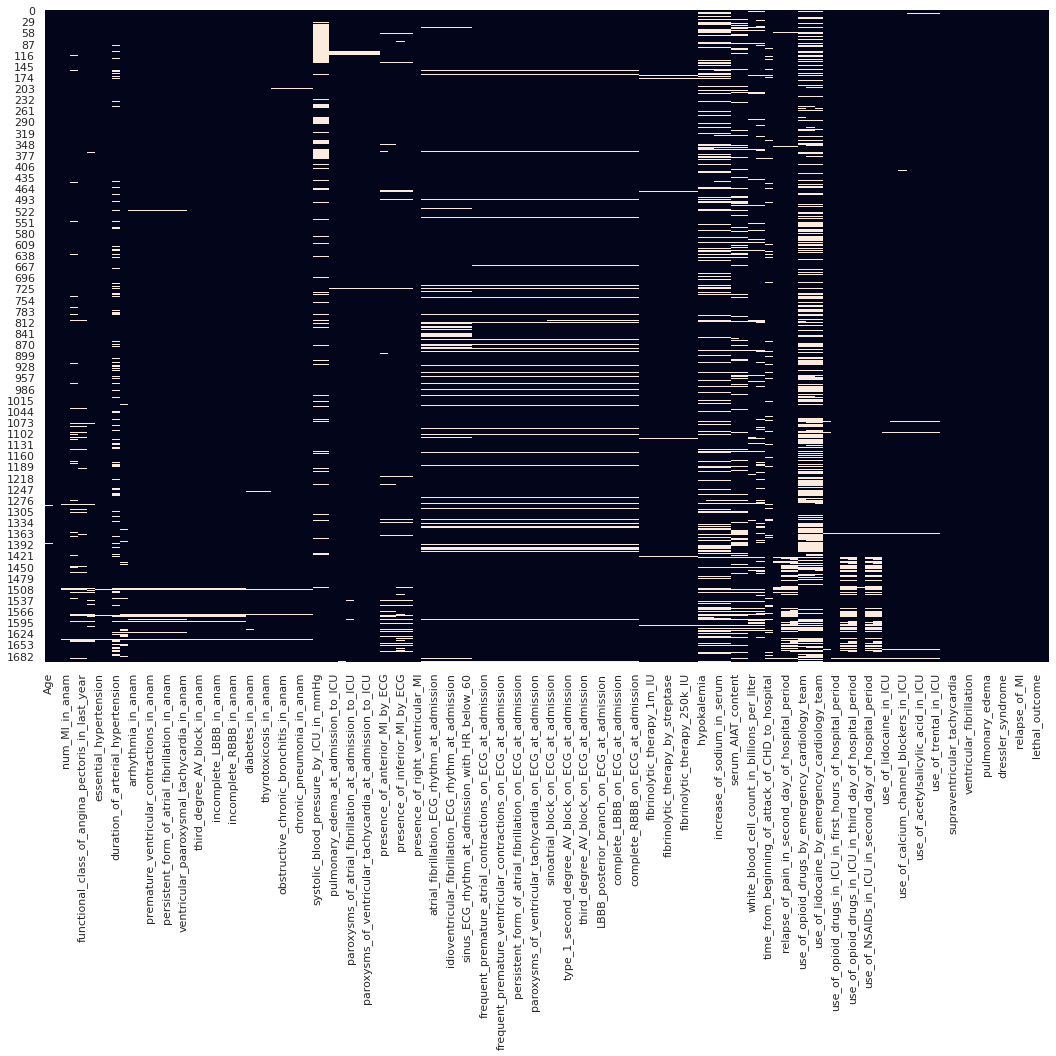

In [33]:
# sort = new_df.sort_values()
sns.set(rc={'figure.figsize':(18, 12)})
sns.heatmap(new_df.isnull(), cbar=False)
sns.reset_orig()

We can identify some trends in the missing values. For example, there's a group of missing values regarding the "in_anam" columns, meaning that the patient didn't have a medical history available. Another larger group concerns the usage of an ECG on admission to the hospital. A still larger group, which thankfully is limited to three columns, has to do with blood levels of different molecules. Finally, a majority of patients did not have data available for the use of various drugs by the hospital. 

By identifying these groups of missing data, we can better understand the real life application of how future data might be similarly sparse. For now, we'll remove the columns where the majority of data is missing (the hospital drug columns), and impute the remainder. We shouldn't need to completely remove any of the columns entirely. 

In [34]:
clean_new_df = new_df.copy()

In [35]:
len(clean_new_df)

1700

In [36]:
threshold = len(clean_new_df) * 0.77
threshold

1309.0

In [37]:
clean_new_df = clean_new_df.dropna(thresh=threshold, axis=1)

In [38]:
clean_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 117 entries, Age to target
dtypes: int64(14), object(103)
memory usage: 1.5+ MB


<a id="Imputation"></a>

## 3.1.3 Imputation 

Once again, we find ourselves with a few options at our disposal. Generally speaking, you can impute missing data with what's known as simple imputation, or with iterative imputation. 

Simple imputation is a fast and widely used method that involves replacing the missing value with the mean or mode of a given feature. Unfortunately, it's also a poor solution in terms of its ability to treat a given feature as one piece connected to a whole. For example, simple imputation doesn't understand that feature A might be related to feature B in some meaningful way. 

Iterative imputation, on the other hand, attempts to take these relationships between features into account when determining what to fill in for a given missing value. Iterative imputation uses predictive modelling to make more nuanced estimates of the targets (in this case, the missing values). This gives much higher quality data to our models that we're ultimately looking to build. One downside to an iterative approach is that because of this increased processing, it's more computationally expensive. Another noteworthy aspect is that in the sklearn library, this is still an experimental feature. If this causes reliability concerns, simple imputation might be a safer choice.

Because we should see increased translation to real world data by retaining as many features as we can at this stage and using values that are as accurate as we can estimate, we'll choose the iterative imputation method. 

In [39]:
no_nan_df = clean_new_df.copy()

In [40]:
no_nan_df.isnull().sum()

Age                                                                  8
Sex                                                                  0
num_MI_in_anam                                                       4
exertional_angina_pectoris_in_anam                                 106
functional_class_of_angina_pectoris_in_last_year                    73
CHD_in_recent_weeks                                                 51
essential_hypertension                                               9
symptomatic_hypertension                                             8
duration_of_arterial_hypertension                                  248
chronic_heart_failure_in_anam                                       54
arrhythmia_in_anam                                                  21
premature_atrial_contractions_in_anam                               21
premature_ventricular_contractions_in_anam                          21
paroxysms_of_atrial_fibrillation_in_anam                            21
persis

In [41]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imp = IterativeImputer(max_iter=30, random_state=1)
no_nan_df[:] = imp.fit_transform(no_nan_df)
no_nan_df.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,re

In [42]:
no_nan_df = no_nan_df.round()
no_nan_df = no_nan_df.apply(lambda x: abs(x).astype(int))
no_nan_df.head()

,Age,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,serum_potassium_content,increase_of_sodium_in_serum,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,atrial_fibrillation,supraventricular_tachycardia,ventricular_tachycardia,ventricular_fibrillation,third_degree_AV_block,pulmonary_edema,myocardial_rupture,dressler_syndrome,chronic_heart_failure,re

In [43]:
no_nan_df.isnull().sum()

Age                                                                0
Sex                                                                0
num_MI_in_anam                                                     0
exertional_angina_pectoris_in_anam                                 0
functional_class_of_angina_pectoris_in_last_year                   0
CHD_in_recent_weeks                                                0
essential_hypertension                                             0
symptomatic_hypertension                                           0
duration_of_arterial_hypertension                                  0
chronic_heart_failure_in_anam                                      0
arrhythmia_in_anam                                                 0
premature_atrial_contractions_in_anam                              0
premature_ventricular_contractions_in_anam                         0
paroxysms_of_atrial_fibrillation_in_anam                           0
persistent_form_of_atrial_fibrilla

<a id="Feature_engineering"></a>

## 3.2 Feature Engineering

At the beginning, we discussed a secondary goal we could pursue, in which we predict complications both at the patient's time of admission to the hospital, and after being there for three days. To follow through with this, we'll make two versions of the existing dataset: one with all the columns so far, and one only with the columns available at the time of admission. 

We'll ultimately call the dataframe with the full hospital stay `day_three_df`, and the dataframe at the time of admission will be `admission_df`.

Because we need to treat categorical data and numerical data slightly differently, for now we also need to create a distinction between these columns. 

<a id="Separating_into_categorical,_numerical,_and_admissions-only_features"></a>

### 3.2.1 Separating Into Categorical, Numerical, and Admissions-only Features

In [44]:
df2 = no_nan_df.copy()

In [45]:
df2['lethal_outcome'].value_counts()

0    1429
1     110
3      54
6      27
7      27
4      23
2      18
5      12
Name: lethal_outcome, dtype: int64

In [46]:
# identifying only the remaining categorical columns using the data description.

cat_cols = ['Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'increase_of_sodium_in_serum',
     'time_from_beginning_of_attack_of_CHD_to_hospital', 'relapse_of_pain_in_first_hours_of_hospital_period', 'relapse_of_pain_in_second_day_of_hospital_period', 'relapse_of_pain_in_third_day_of_hospital_period',
     'use_of_liquid_nitrates_in_ICU', 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period',
     'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period', 'use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period',
     'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU', 'lethal_outcome']


In [47]:
# identifying only the remaining numerical columns using the data description.

real_cols = [
     'Age', 'systolic_blood_pressure_by_ICU_in_mmHg', 'diastolic_blood_pressure_by_ICU_in_mmHg', 'serum_potassium_content',
     'serum_sodium_content', 'serum_AlAT_content', 'serum_AsAT_content', 'white_blood_cell_count_in_billions_per_liter', 
     'erythrocyte_sedimentation_rate']

In [48]:
# identifying only the remaining columns available at the time of admission to the hospital using the data description.

admission_cols = ['Sex', 'num_MI_in_anam', 'exertional_angina_pectoris_in_anam', 
     'functional_class_of_angina_pectoris_in_last_year', 'CHD_in_recent_weeks', 'essential_hypertension', 'symptomatic_hypertension',
     'duration_of_arterial_hypertension', 'chronic_heart_failure_in_anam', 'arrhythmia_in_anam', 'premature_atrial_contractions_in_anam', 'premature_ventricular_contractions_in_anam',
     'paroxysms_of_atrial_fibrillation_in_anam', 'persistent_form_of_atrial_fibrillation_in_anam', 'ventricular_fibrillation_in_anam', 'ventricular_paaroxysmal_tachycardia_in_anam', 'first_degree_AV_block_in_anam',
     'third_degree_AV_block_in_anam', 'LBBB_anterior_in_anam', 'incomplete_LBBB_in_anam', 'complete_LBBB_in_anam', 'incomplete_RBBB_in_anam',
     'complete_RBBB_in_anam', 'diabetes_in_anam', 'obesity_in_anam', 'thyrotoxicosis_in_anam', 'chronic_bronchitis_in_anam',
     'obstructive_chronic_bronchitis_in_anam', 'bronchial_asthma_in_anam', 'chronic_pneumonia_in_anam', 'pulmonary_tuberculosis_in_anam', 'pulmonary_edema_at_admission_to_ICU', 'cardiogenic_shock_at_admission_to_ICU',
     'paroxysms_of_atrial_fibrillation_at_admission_to_ICU', 'paroxysms_of_supraventricular_techycardia_at_admission_to_ICU', 'paroxysms_of_ventricular_tachycardia_at_admission_to_ICU', 'ventricular_fibrillation_at_admission_to_ICU', 'presence_of_anterior_MI_by_ECG',
     'presence_of_lateral_MI_by_ECG', 'presence_of_inferior_MI_by_ECG', 'presence_of_posterior_MI_by_ECG', 'presence_of_right_ventricular_MI', 'sinus_ECG_rhythm_at_admission_with_HR_60-90',
     'atrial_fibrillation_ECG_rhythm_at_admission', 'atrial_ECG_rhythm_at_admission', 'idioventricular_fibrillation_ECG_rhythm_at_admission', 'sinus_ECG_rhythm_at_admission_with_HR_above_90', 'sinus_ECG_rhythm_at_admission_with_HR_below_60', 
     'premature_atrial_contractions_on_ECG_at_admission', 'frequent_premature_atrial_contractions_on_ECG_at_admission', 'premature_ventricular_contractions_on_ECG_at_admission', 'frequent_premature_ventricular_contractions_on_ECG_at_admission', 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission',
     'persistent_form_of_atrial_fibrillation_on_ECG_at_admission', 'paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission', 'paroxysms_of_ventricular_tachycardia_on_ECG_at_admission', 'ventricular_fibrillation_on_ECG_at_admission', 'sinoatrial_block_on_ECG_at_admission',
     'first_degree_AV_block_on_ECG_at_admission', 'type_1_second_degree_AV_block_on_ECG_at_admission', 'type_2_second_degree_AV_block_on_ECG_at_admission', 'third_degree_AV_block_on_ECG_at_admission', 'LBBB_anterior_branch_on_ECG_at_admission', 
     'LBBB_posterior_branch_on_ECG_at_admission', 'incomplete_LBBB_on_ECG_at_admission', 'complete_LBBB_on_ECG_at_admission', 'incomplete_RBBB_on_ECG_at_admission', 'complete_RBBB_on_ECG_at_admission',
     'fibrinolytic_therapy_750k_IU', 'fibrinolytic_therapy_1m_IU', 'fibrinolytic_therapy_3m_IU', 'fibrinolytic_therapy_by_streptase', 'fibrinolytic_therapy_500k_IU', 
     'fibrinolytic_therapy_250k_IU', 'fibrinolytic_therapy_by_streptodecase_1.5m_IU', 'hypokalemia', 'increase_of_sodium_in_serum',
     'time_from_beginning_of_attack_of_CHD_to_hospital', 'use_of_liquid_nitrates_in_ICU', 'use_of_lidocaine_in_ICU', 'use_of_beta-blockers_in_ICU', 'use_of_calcium_channel_blockers_in_ICU', 'use_of_heparin_in_ICU', 'use_of_acetylsalicylic_acid_in_ICU', 
     'use_of_ticlid_in_ICU', 'use_of_trental_in_ICU']

In [49]:
df2[cat_cols].head()

,Sex,num_MI_in_anam,exertional_angina_pectoris_in_anam,functional_class_of_angina_pectoris_in_last_year,CHD_in_recent_weeks,essential_hypertension,symptomatic_hypertension,duration_of_arterial_hypertension,chronic_heart_failure_in_anam,arrhythmia_in_anam,premature_atrial_contractions_in_anam,premature_ventricular_contractions_in_anam,paroxysms_of_atrial_fibrillation_in_anam,persistent_form_of_atrial_fibrillation_in_anam,ventricular_fibrillation_in_anam,ventricular_paaroxysmal_tachycardia_in_anam,first_degree_AV_block_in_anam,third_degree_AV_block_in_anam,LBBB_anterior_in_anam,incomplete_LBBB_in_anam,complete_LBBB_in_anam,incomplete_RBBB_in_anam,complete_RBBB_in_anam,diabetes_in_anam,obesity_in_anam,thyrotoxicosis_in_anam,chronic_bronchitis_in_anam,obstructive_chronic_bronchitis_in_anam,bronchial_asthma_in_anam,chronic_pneumonia_in_anam,pulmonary_tuberculosis_in_anam,pulmonary_edema_at_admission_to_ICU,cardiogenic_shock_at_admission_to_ICU,paroxysms_of_atrial_fibrillation_at_admission_to_ICU,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU,ventricular_fibrillation_at_admission_to_ICU,presence_of_anterior_MI_by_ECG,presence_of_lateral_MI_by_ECG,presence_of_inferior_MI_by_ECG,presence_of_posterior_MI_by_ECG,presence_of_right_ventricular_MI,sinus_ECG_rhythm_at_admission_with_HR_60-90,atrial_fibrillation_ECG_rhythm_at_admission,atrial_ECG_rhythm_at_admission,idioventricular_fibrillation_ECG_rhythm_at_admission,sinus_ECG_rhythm_at_admission_with_HR_above_90,sinus_ECG_rhythm_at_admission_with_HR_below_60,premature_atrial_contractions_on_ECG_at_admission,frequent_premature_atrial_contractions_on_ECG_at_admission,premature_ventricular_contractions_on_ECG_at_admission,frequent_premature_ventricular_contractions_on_ECG_at_admission,paroxysms_of_atrial_fibrillation_on_ECG_at_admission,persistent_form_of_atrial_fibrillation_on_ECG_at_admission,paroxysms_of_supraventricular_tachycardia_on_ECG_at_admission,paroxysms_of_ventricular_tachycardia_on_ECG_at_admission,ventricular_fibrillation_on_ECG_at_admission,sinoatrial_block_on_ECG_at_admission,first_degree_AV_block_on_ECG_at_admission,type_1_second_degree_AV_block_on_ECG_at_admission,type_2_second_degree_AV_block_on_ECG_at_admission,third_degree_AV_block_on_ECG_at_admission,LBBB_anterior_branch_on_ECG_at_admission,LBBB_posterior_branch_on_ECG_at_admission,incomplete_LBBB_on_ECG_at_admission,complete_LBBB_on_ECG_at_admission,incomplete_RBBB_on_ECG_at_admission,complete_RBBB_on_ECG_at_admission,fibrinolytic_therapy_750k_IU,fibrinolytic_therapy_1m_IU,fibrinolytic_therapy_3m_IU,fibrinolytic_therapy_by_streptase,fibrinolytic_therapy_500k_IU,fibrinolytic_therapy_250k_IU,fibrinolytic_therapy_by_streptodecase_1.5m_IU,hypokalemia,increase_of_sodium_in_serum,time_from_beginning_of_attack_of_CHD_to_hospital,relapse_of_pain_in_first_hours_of_hospital_period,relapse_of_pain_in_second_day_of_hospital_period,relapse_of_pain_in_third_day_of_hospital_period,use_of_liquid_nitrates_in_ICU,use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period,use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period,use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_first_hours_of_hospital_period,use_of_NSAIDs_in_ICU_in_second_day_of_hospital_period,use_of_NSAIDs_in_ICU_in_third_day_of_hospital_period,use_of_lidocaine_in_ICU,use_of_beta-blockers_in_ICU,use_of_calcium_channel_blockers_in_ICU,use_of_heparin_in_ICU,use_of_acetylsalicylic_acid_in_ICU,use_of_ticlid_in_ICU,use_of_trental_in_ICU,lethal_outcome
0,1,2,1,1,2,3,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,1,0
2,1,0,0,0,2,2,0,2,0,0,0,0,0,0,0,0,0,

In [50]:
df2[real_cols].head()

,Age,systolic_blood_pressure_by_ICU_in_mmHg,diastolic_blood_pressure_by_ICU_in_mmHg,serum_potassium_content,serum_sodium_content,serum_AlAT_content,serum_AsAT_content,white_blood_cell_count_in_billions_per_liter,erythrocyte_sedimentation_rate
0,77,180,100,5,138,0,0,8,16
1,55,120,90,4,132,0,0,8,3
2,52,180,100,4,132,0,0,11,9
3,68,120,70,4,146,1,0,9,14
4,60,160,90,4,132,0,0,8,15


In [51]:
cats_df = df2[cat_cols]
real_df = df2[real_cols]
admission_cats_df = df2[admission_cols]

In [52]:
cats_df.shape

(1700, 96)

In [53]:
real_df.shape

(1700, 9)

In [54]:
admission_cats_df.shape

(1700, 86)

<a id="Creation_of_new_columns"></a>

### 3.2.2 Creation of New Columns

Choices, choices! 

We can create the columns that isolate each of these values in a couple different ways. The preferred way, which we'll use here, involves a process called one-hot encoding. It's a slightly more robust version of the other way often seen, a pandas library called "get_dummies". Both processes create a unique column per value, but one-hot encoding can receive new data more easily than get_dummies will, making it more flexibile.

The thing to be aware of in the case of many unique values is a phenomenon called "the curse of dimensionality", in which so many features are created in the dataset that there are too few combinations of features to be useful. Feature engineering is therefore a balance of creating useful combinations of features that are not too many, nor too few. 

We should be able to avoid this issue here, but if it turns out we have too many features, we can always pursue methods of reducing the dimensionality while seeking to preserve the relationships we've identified. 

In [55]:
from sklearn.preprocessing import OneHotEncoder

def one_hot(df, cols):
    enc = OneHotEncoder(sparse=False)
    df_encoded = pd.DataFrame(enc.fit_transform(df))
    df_encoded.columns = enc.get_feature_names(cols)
    return df_encoded

<a id="Categorical_one-hot_encoding"></a>

#### 3.2.2.1 Categorical One-Hot Encoding

In [56]:
cats_encoded = one_hot(cats_df, cat_cols)
cats_encoded.head()

,Sex_0,Sex_1,num_MI_in_anam_0,num_MI_in_anam_1,num_MI_in_anam_2,num_MI_in_anam_3,exertional_angina_pectoris_in_anam_0,exertional_angina_pectoris_in_anam_1,exertional_angina_pectoris_in_anam_2,exertional_angina_pectoris_in_anam_3,exertional_angina_pectoris_in_anam_4,exertional_angina_pectoris_in_anam_5,exertional_angina_pectoris_in_anam_6,functional_class_of_angina_pectoris_in_last_year_0,functional_class_of_angina_pectoris_in_last_year_1,functional_class_of_angina_pectoris_in_last_year_2,functional_class_of_angina_pectoris_in_last_year_3,functional_class_of_angina_pectoris_in_last_year_4,CHD_in_recent_weeks_0,CHD_in_recent_weeks_1,CHD_in_recent_weeks_2,essential_hypertension_0,essential_hypertension_1,essential_hypertension_2,essential_hypertension_3,symptomatic_hypertension_0,symptomatic_hypertension_1,duration_of_arterial_hypertension_0,duration_of_arterial_hypertension_1,duration_of_arterial_hypertension_2,duration_of_arterial_hypertension_3,duration_of_arterial_hypertension_4,duration_of_arterial_hypertension_5,duration_of_arterial_hypertension_6,duration_of_arterial_hypertension_7,duration_of_arterial_hypertension_8,duration_of_arterial_hypertension_9,chronic_heart_failure_in_anam_0,chronic_heart_failure_in_anam_1,chronic_heart_failure_in_anam_2,chronic_heart_failure_in_anam_3,chronic_heart_failure_in_anam_4,arrhythmia_in_anam_0,arrhythmia_in_anam_1,premature_atrial_contractions_in_anam_0,premature_atrial_contractions_in_anam_1,premature_ventricular_contractions_in_anam_0,premature_ventricular_contractions_in_anam_1,paroxysms_of_atrial_fibrillation_in_anam_0,paroxysms_of_atrial_fibrillation_in_anam_1,persistent_form_of_atrial_fibrillation_in_anam_0,persistent_form_of_atrial_fibrillation_in_anam_1,ventricular_fibrillation_in_anam_0,ventricular_fibrillation_in_anam_1,ventricular_paaroxysmal_tachycardia_in_anam_0,ventricular_paaroxysmal_tachycardia_in_anam_1,first_degree_AV_block_in_anam_0,first_degree_AV_block_in_anam_1,third_degree_AV_block_in_anam_0,third_degree_AV_block_in_anam_1,LBBB_anterior_in_anam_0,LBBB_anterior_in_anam_1,incomplete_LBBB_in_anam_0,incomplete_LBBB_in_anam_1,complete_LBBB_in_anam_0,complete_LBBB_in_anam_1,incomplete_RBBB_in_anam_0,incomplete_RBBB_in_anam_1,complete_RBBB_in_anam_0,complete_RBBB_in_anam_1,diabetes_in_anam_0,diabetes_in_anam_1,obesity_in_anam_0,obesity_in_anam_1,thyrotoxicosis_in_anam_0,thyrotoxicosis_in_anam_1,chronic_bronchitis_in_anam_0,chronic_bronchitis_in_anam_1,obstructive_chronic_bronchitis_in_anam_0,obstructive_chronic_bronchitis_in_anam_1,bronchial_asthma_in_anam_0,bronchial_asthma_in_anam_1,chronic_pneumonia_in_anam_0,chronic_pneumonia_in_anam_1,pulmonary_tuberculosis_in_anam_0,pulmonary_tuberculosis_in_anam_1,pulmonary_edema_at_admission_to_ICU_0,pulmonary_edema_at_admission_to_ICU_1,cardiogenic_shock_at_admission_to_ICU_0,cardiogenic_shock_at_admission_to_ICU_1,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_0,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_1,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_0,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_1,ventricular_fibrillation_at_admission_to_ICU_0,ventricular_fibrillation_at_admission_to_ICU_1,presence_of_anterior_MI_by_ECG_0,presence_of_anterior_MI_by_ECG_1,presence_of_anterior_MI_by_ECG_2,presence_of_anterior_MI_by_ECG_3,presence_of_anterior_MI_by_ECG_4,presence_of_lateral_MI_by_ECG_0,presence_of_lateral_MI_by_ECG_1,presence_of_lateral_MI_by_ECG_2,presence_of_lateral_MI_by_ECG_3,presence_of_lateral_MI_by_ECG_4,presence_of_inferior_MI_by_ECG_0,presence_of_inferior_MI_by_ECG_1,presence_of_inferior_MI_by_ECG_2,presence_of_inferior_MI_by_ECG_3,presence_of_inferior_MI_by_ECG_4,presence_of_posterior_MI_by_ECG_0,presence_of_posterior_MI_by_ECG_1,presence_of_posterior_MI_by_ECG_2,presence_of_posterior_MI_by_ECG_3,presence_of_posterior_MI_by_ECG_4,presence_of_right_ventric

In [57]:
print('Number of features in cats_encoded:', cats_encoded.shape[1])

Number of features in cats_encoded: 259


In [58]:
cats_encoded['lethal_outcome_1'].value_counts()

0.0    1590
1.0     110
Name: lethal_outcome_1, dtype: int64

In [59]:
cats_encoded = cats_encoded.drop('lethal_outcome_0', axis=1)

<a id="Real_binning"></a>

#### 3.2.2.2 Real Binning

Earlier I mentioned we needed to treat categorical and numerical columns a bit differently. If we were to one-hot encode the many unique values in a given numerical column, we would certainly run into the curse of dimensionality. 

To solve this problem, we'll instead group ranges of these numerical values together. Once we have a small but useful number of groups, we can apply one-hot encoding as before. 

The way we'll determine what the group cutoffs are will have to do with finding cutoff points that will contain roughly equivalent numbers of values. This proportional cutoff approach will provide more meaningful data to a machine learning model than if we selected a different common approach which uses equivalent points within the range of values. 

In [60]:
def binning_q_cuts(df, column_name):
    df[column_name + ' category'] = pd.qcut(df[column_name], 5, duplicates='drop')
    # delete the old, non-categorized columns
    del df[column_name]
    return df

In [61]:
for col in real_df:
    binned_real_df = binning_q_cuts(real_df, col)
    
# avoid the for loop? also, address the .copy warning
# binned_real_df = real_df.apply(binning_q_cuts(real_df))


<ipython-input-60-89e014d8705b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + ' category'] = pd.qcut(df[column_name], 5, duplicates='drop')
<ipython-input-60-89e014d8705b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name + ' category'] = pd.qcut(df[column_name], 5, duplicates='drop')
<ipython-input-60-89e014d8705b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

In [62]:
for col in binned_real_df:
    print(binned_real_df[col].value_counts())

(60.0, 65.0]      374
(52.0, 60.0]      356
(25.999, 52.0]    348
(71.2, 92.0]      340
(65.0, 71.2]      282
Name: Age category, dtype: int64
(-0.001, 120.0]    550
(140.0, 160.0]     358
(120.0, 130.0]     299
(130.0, 140.0]     296
(160.0, 260.0]     197
Name: systolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(74.0, 80.0]      562
(-0.001, 74.0]    342
(89.0, 92.0]      335
(92.0, 190.0]     332
(80.0, 89.0]      129
Name: diastolic_blood_pressure_by_ICU_in_mmHg category, dtype: int64
(1.999, 4.0]    1306
(4.0, 5.0]       315
(5.0, 8.0]        79
Name: serum_potassium_content category, dtype: int64
(133.0, 136.0]      435
(116.999, 133.0]    419
(138.0, 140.0]      284
(140.0, 169.0]      284
(136.0, 138.0]      278
Name: serum_sodium_content category, dtype: int64
(-0.001, 1.0]    1648
(1.0, 3.0]         52
Name: serum_AlAT_content category, dtype: int64
(-0.001, 2.0]    1700
Name: serum_AsAT_content category, dtype: int64
(6.0, 8.0]      508
(1.999, 6.0]    423
(11.0, 

<a id="Real_one-hot_encoding"></a>

#### 3.2.2.3 Real One-Hot Encoding

In [63]:
real_encoded = one_hot(real_df, real_cols)
real_encoded.head()

,"Age_(25.999, 52.0]","Age_(52.0, 60.0]","Age_(60.0, 65.0]","Age_(65.0, 71.2]","Age_(71.2, 92.0]","systolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 120.0]","systolic_blood_pressure_by_ICU_in_mmHg_(120.0, 130.0]","systolic_blood_pressure_by_ICU_in_mmHg_(130.0, 140.0]","systolic_blood_pressure_by_ICU_in_mmHg_(140.0, 160.0]","systolic_blood_pressure_by_ICU_in_mmHg_(160.0, 260.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 74.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(74.0, 80.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(80.0, 89.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(89.0, 92.0]","diastolic_blood_pressure_by_ICU_in_mmHg_(92.0, 190.0]","serum_potassium_content_(1.999, 4.0]","serum_potassium_content_(4.0, 5.0]","serum_potassium_content_(5.0, 8.0]","serum_sodium_content_(116.999, 133.0]","serum_sodium_content_(133.0, 136.0]","serum_sodium_content_(136.0, 138.0]","serum_sodium_content_(138.0, 140.0]","serum_sodium_content_(140.0, 169.0]","serum_AlAT_content_(-0.001, 1.0]","serum_AlAT_content_(1.0, 3.0]","serum_AsAT_content_(-0.001, 2.0]","white_blood_cell_count_in_billions_per_liter_(1.999, 6.0]","white_blood_cell_count_in_billions_per_liter_(6.0, 8.0]","white_blood_cell_count_in_billions_per_liter_(8.0, 9.0]","white_blood_cell_count_in_billions_per_liter_(9.0, 11.0]","white_blood_cell_count_in_billions_per_liter_(11.0, 28.0]","erythrocyte_sedimentation_rate_(0.999, 5.0]","erythrocyte_sedimentation_rate_(5.0, 9.0]","erythrocyte_sedimentation_rate_(9.0, 13.0]","erythrocyte_sedimentation_rate_(13.0, 20.0]","erythrocyte_sedimentation_rate_(20.0, 140.0]"
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [64]:
print('Number of features in real_encoded:', real_encoded.shape[1])

Number of features in real_encoded: 36


<a id="Admissions_one-hot_encoding"></a>

#### 3.2.2.4 Admissions One-Hot Encoding

In [65]:
admission_cats_encoded = one_hot(admission_cats_df, admission_cols)
admission_cats_encoded.head()

,Sex_0,Sex_1,num_MI_in_anam_0,num_MI_in_anam_1,num_MI_in_anam_2,num_MI_in_anam_3,exertional_angina_pectoris_in_anam_0,exertional_angina_pectoris_in_anam_1,exertional_angina_pectoris_in_anam_2,exertional_angina_pectoris_in_anam_3,exertional_angina_pectoris_in_anam_4,exertional_angina_pectoris_in_anam_5,exertional_angina_pectoris_in_anam_6,functional_class_of_angina_pectoris_in_last_year_0,functional_class_of_angina_pectoris_in_last_year_1,functional_class_of_angina_pectoris_in_last_year_2,functional_class_of_angina_pectoris_in_last_year_3,functional_class_of_angina_pectoris_in_last_year_4,CHD_in_recent_weeks_0,CHD_in_recent_weeks_1,CHD_in_recent_weeks_2,essential_hypertension_0,essential_hypertension_1,essential_hypertension_2,essential_hypertension_3,symptomatic_hypertension_0,symptomatic_hypertension_1,duration_of_arterial_hypertension_0,duration_of_arterial_hypertension_1,duration_of_arterial_hypertension_2,duration_of_arterial_hypertension_3,duration_of_arterial_hypertension_4,duration_of_arterial_hypertension_5,duration_of_arterial_hypertension_6,duration_of_arterial_hypertension_7,duration_of_arterial_hypertension_8,duration_of_arterial_hypertension_9,chronic_heart_failure_in_anam_0,chronic_heart_failure_in_anam_1,chronic_heart_failure_in_anam_2,chronic_heart_failure_in_anam_3,chronic_heart_failure_in_anam_4,arrhythmia_in_anam_0,arrhythmia_in_anam_1,premature_atrial_contractions_in_anam_0,premature_atrial_contractions_in_anam_1,premature_ventricular_contractions_in_anam_0,premature_ventricular_contractions_in_anam_1,paroxysms_of_atrial_fibrillation_in_anam_0,paroxysms_of_atrial_fibrillation_in_anam_1,persistent_form_of_atrial_fibrillation_in_anam_0,persistent_form_of_atrial_fibrillation_in_anam_1,ventricular_fibrillation_in_anam_0,ventricular_fibrillation_in_anam_1,ventricular_paaroxysmal_tachycardia_in_anam_0,ventricular_paaroxysmal_tachycardia_in_anam_1,first_degree_AV_block_in_anam_0,first_degree_AV_block_in_anam_1,third_degree_AV_block_in_anam_0,third_degree_AV_block_in_anam_1,LBBB_anterior_in_anam_0,LBBB_anterior_in_anam_1,incomplete_LBBB_in_anam_0,incomplete_LBBB_in_anam_1,complete_LBBB_in_anam_0,complete_LBBB_in_anam_1,incomplete_RBBB_in_anam_0,incomplete_RBBB_in_anam_1,complete_RBBB_in_anam_0,complete_RBBB_in_anam_1,diabetes_in_anam_0,diabetes_in_anam_1,obesity_in_anam_0,obesity_in_anam_1,thyrotoxicosis_in_anam_0,thyrotoxicosis_in_anam_1,chronic_bronchitis_in_anam_0,chronic_bronchitis_in_anam_1,obstructive_chronic_bronchitis_in_anam_0,obstructive_chronic_bronchitis_in_anam_1,bronchial_asthma_in_anam_0,bronchial_asthma_in_anam_1,chronic_pneumonia_in_anam_0,chronic_pneumonia_in_anam_1,pulmonary_tuberculosis_in_anam_0,pulmonary_tuberculosis_in_anam_1,pulmonary_edema_at_admission_to_ICU_0,pulmonary_edema_at_admission_to_ICU_1,cardiogenic_shock_at_admission_to_ICU_0,cardiogenic_shock_at_admission_to_ICU_1,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0,paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_0,paroxysms_of_supraventricular_techycardia_at_admission_to_ICU_1,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_0,paroxysms_of_ventricular_tachycardia_at_admission_to_ICU_1,ventricular_fibrillation_at_admission_to_ICU_0,ventricular_fibrillation_at_admission_to_ICU_1,presence_of_anterior_MI_by_ECG_0,presence_of_anterior_MI_by_ECG_1,presence_of_anterior_MI_by_ECG_2,presence_of_anterior_MI_by_ECG_3,presence_of_anterior_MI_by_ECG_4,presence_of_lateral_MI_by_ECG_0,presence_of_lateral_MI_by_ECG_1,presence_of_lateral_MI_by_ECG_2,presence_of_lateral_MI_by_ECG_3,presence_of_lateral_MI_by_ECG_4,presence_of_inferior_MI_by_ECG_0,presence_of_inferior_MI_by_ECG_1,presence_of_inferior_MI_by_ECG_2,presence_of_inferior_MI_by_ECG_3,presence_of_inferior_MI_by_ECG_4,presence_of_posterior_MI_by_ECG_0,presence_of_posterior_MI_by_ECG_1,presence_of_posterior_MI_by_ECG_2,presence_of_posterior_MI_by_ECG_3,presence_of_posterior_MI_by_ECG_4,presence_of_right_ventric

In [66]:
print('Number of features in admission_cats_encoded:', admission_cats_encoded.shape[1])

Number of features in admission_cats_encoded: 215


<a id="Combining_categorical_and_real_data"></a>

### 3.2.3 Combining Categorical and Real Data

We'll combine the categorical and real dataframes for both the day three and admissions datasets, now that they're encoded appropriately for our machine learning model.

After they're combined, we'll bring in the summed complications target column from earlier.

In [67]:
day_three_df = pd.concat([real_encoded, cats_encoded], axis=1)

In [68]:
day_three_df['target'] = data['target']

In [69]:
day_three_df['target'].value_counts()

0    765
1    639
2    201
3     74
4     19
5      2
Name: target, dtype: int64

#### A Note on Lethal Outcomes 

Because all the complications features are binary except for lethal outcomes, previously we summed them to get the target column. However, various lethal outcomes, represented by numbers 1 through 7, are also complications, so we need to include any instance of these in our target as well. 

We added the lethal_column category to the cat_cols list just above, so we could use one-hot encoding to create separate features to represent each of those 7 reasons for lethal outcome. We then can take these features and add them to our target. 

Once they're included in the target, we'll remove the lethal outcome columns so that just like the other complications, we're not creating data leakage in our modelling process.


In [70]:
lethal_outcomes_target = ['lethal_outcome_1', 'lethal_outcome_2', 'lethal_outcome_3', 'lethal_outcome_4', 
    'lethal_outcome_5', 'lethal_outcome_6', 'lethal_outcome_7', 'target']

In [71]:
day_three_df['target'] = day_three_df[lethal_outcomes_target].sum(axis=1)

In [72]:
day_three_df['target'].value_counts()

0.0    663
1.0    636
2.0    269
3.0     89
4.0     36
5.0      7
Name: target, dtype: int64

In [73]:
lethal_outcomes = ['lethal_outcome_1', 'lethal_outcome_2', 'lethal_outcome_3', 'lethal_outcome_4', 
    'lethal_outcome_5', 'lethal_outcome_6', 'lethal_outcome_7']

In [74]:
day_three_df = day_three_df.drop(columns=lethal_outcomes)

In [75]:
admission_df = pd.concat([real_encoded, admission_cats_encoded], axis=1)

In [76]:
admission_df['target'] = day_three_df['target']

In [77]:
day_three_df.shape

(1700, 288)

In [78]:
admission_df.shape

(1700, 252)

<a id="Feature_selection"></a>

## 3.3 Feature Selection


Our goal here will be to select only the features that are only strongly correlated to the target, based on a threshold we specify. 

First, let's make a function that will allow us to easily apply this logic to each dataframe. By specifying the threshold value when we call this function, we can quickly obtain new combinations of features to feed to the models. 


In [79]:
def get_best_corrs(df, thresh):
    corr_no_nan = df.corr().abs()
    sorted_corrs = corr_no_nan['target'].sort_values(ascending=False)

    best_corrs = sorted_corrs[sorted_corrs > thresh]
    return best_corrs

<a id="Day_three_feature_selection"></a>

### 3.3.1 Day Three Feature Selection

In [80]:
day_three_best = get_best_corrs(day_three_df, 0.1)

In [81]:
day_three_best

target                                                            1.000000
use_of_liquid_nitrates_in_ICU_0                                   0.233374
use_of_liquid_nitrates_in_ICU_1                                   0.233374
use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period_0    0.211023
relapse_of_pain_in_third_day_of_hospital_period_0                 0.195864
use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0      0.192974
Age_(25.999, 52.0]                                                0.192209
presence_of_anterior_MI_by_ECG_1                                  0.178971
obstructive_chronic_bronchitis_in_anam_1                          0.174425
obstructive_chronic_bronchitis_in_anam_0                          0.174425
relapse_of_pain_in_first_hours_of_hospital_period_0               0.174411
chronic_heart_failure_in_anam_0                                   0.172622
use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_0     0.163572
use_of_opioid_drugs_in_IC

<a id="Admission_feature_selection"></a>

### 3.3.2 Admission Feature Selection

In [82]:
admission_best = get_best_corrs(admission_df, 0.1)

In [83]:
admission_best

target                                                       1.000000
use_of_liquid_nitrates_in_ICU_0                              0.233374
use_of_liquid_nitrates_in_ICU_1                              0.233374
Age_(25.999, 52.0]                                           0.192209
presence_of_anterior_MI_by_ECG_1                             0.178971
obstructive_chronic_bronchitis_in_anam_1                     0.174425
obstructive_chronic_bronchitis_in_anam_0                     0.174425
chronic_heart_failure_in_anam_0                              0.172622
Age_(71.2, 92.0]                                             0.153501
sinus_ECG_rhythm_at_admission_with_HR_60-90_1                0.151639
sinus_ECG_rhythm_at_admission_with_HR_60-90_0                0.151639
Sex_1                                                        0.150963
Sex_0                                                        0.150963
chronic_heart_failure_in_anam_1                              0.143772
presence_of_lateral_

Interesting! A history of obstructive chronic bronchitis has a significant relationship with the target. This seems to indicate the strength of the relationship biologically between the respiratory and cardiovascular systems. Age also shows up, along with myocardial infarctions (heart attacks) detected by ECG, which would be expected. 

The strongest correlation comes from the use of liquid nitrates in the ICU; this might indicate a treatment that is used for patients who are in dire circumstances. 

In the day three dataset, we see significant relationships between various pain markers and the target as well, which might be helpful in understanding the risk a patient faces if they're in a significant amount of pain while at the hospital.

Interestingly, blood pressure did not have a significant correlation to complications from heart attack. More domain knowledge might be helpful here to determine why not.

In [84]:
# when using features now, we have d3_feats and admission_feats

d3_features = list(day_three_best.index)
d3_features.remove('target')

admission_features = list(admission_best.index)
admission_features.remove('target')

In [85]:
d3_features

['use_of_liquid_nitrates_in_ICU_0',
 'use_of_liquid_nitrates_in_ICU_1',
 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period_0',
 'relapse_of_pain_in_third_day_of_hospital_period_0',
 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_0',
 'Age_(25.999, 52.0]',
 'presence_of_anterior_MI_by_ECG_1',
 'obstructive_chronic_bronchitis_in_anam_1',
 'obstructive_chronic_bronchitis_in_anam_0',
 'relapse_of_pain_in_first_hours_of_hospital_period_0',
 'chronic_heart_failure_in_anam_0',
 'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_0',
 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1',
 'relapse_of_pain_in_third_day_of_hospital_period_1',
 'Age_(71.2, 92.0]',
 'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_2',
 'sinus_ECG_rhythm_at_admission_with_HR_60-90_1',
 'sinus_ECG_rhythm_at_admission_with_HR_60-90_0',
 'Sex_1',
 'Sex_0',
 'use_of_opioid_drugs_in_ICU_in_first_hours_of_hospital_period_2',
 'chronic_heart_failure_in_anam_1',
 'pre

In [86]:
admission_features

['use_of_liquid_nitrates_in_ICU_0',
 'use_of_liquid_nitrates_in_ICU_1',
 'Age_(25.999, 52.0]',
 'presence_of_anterior_MI_by_ECG_1',
 'obstructive_chronic_bronchitis_in_anam_1',
 'obstructive_chronic_bronchitis_in_anam_0',
 'chronic_heart_failure_in_anam_0',
 'Age_(71.2, 92.0]',
 'sinus_ECG_rhythm_at_admission_with_HR_60-90_1',
 'sinus_ECG_rhythm_at_admission_with_HR_60-90_0',
 'Sex_1',
 'Sex_0',
 'chronic_heart_failure_in_anam_1',
 'presence_of_lateral_MI_by_ECG_2',
 'functional_class_of_angina_pectoris_in_last_year_0',
 'presence_of_anterior_MI_by_ECG_4',
 'time_from_beginning_of_attack_of_CHD_to_hospital_9',
 'exertional_angina_pectoris_in_anam_0',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_0',
 'paroxysms_of_atrial_fibrillation_at_admission_to_ICU_1',
 'diastolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 74.0]',
 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission_0',
 'paroxysms_of_atrial_fibrillation_on_ECG_at_admission_1',
 'diabetes_in_anam_1',
 'diabetes_in_anam_0',


In [87]:
### 2 options: ###

# features = d3_features
# OR
# features = admission_features

In [88]:
features = d3_features
target = 'target'

<a id="Optional_chi_squared_testing"></a>

### 3.3.3. Optional Chi Squared Testing

One way to look further into feature selection would be to utilize other ways to assess the dependence of the features to the target. Using the following format, we can select the K best features regarding their relation to the target. We can select any number of scoring metrics, including chi squared.

An upside to this approach is that it addresses collinearity. Collinearity is when you have two features that are opposite each other, therefore equally correlated to the target. Having both features involved in the modelling process can hurt the performance of the model. Chi squared testing removes this collinearity in finding the relationship of a given feature to the target.

For the time being, I won't assign the results to the feature variable, so that we can move on with our current feature set. We can play with this after some modelling results if necessary. 

In [89]:
from sklearn.feature_selection import SelectKBest, chi2

In [90]:
all_X = day_three_df.columns.drop('target')
all_X

Index(['Age_(25.999, 52.0]', 'Age_(52.0, 60.0]', 'Age_(60.0, 65.0]',
       'Age_(65.0, 71.2]', 'Age_(71.2, 92.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(-0.001, 120.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(120.0, 130.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(130.0, 140.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(140.0, 160.0]',
       'systolic_blood_pressure_by_ICU_in_mmHg_(160.0, 260.0]',
       ...
       'use_of_calcium_channel_blockers_in_ICU_0',
       'use_of_calcium_channel_blockers_in_ICU_1', 'use_of_heparin_in_ICU_0',
       'use_of_heparin_in_ICU_1', 'use_of_acetylsalicylic_acid_in_ICU_0',
       'use_of_acetylsalicylic_acid_in_ICU_1', 'use_of_ticlid_in_ICU_0',
       'use_of_ticlid_in_ICU_1', 'use_of_trental_in_ICU_0',
       'use_of_trental_in_ICU_1'],
      dtype='object', length=287)

In [91]:
test = SelectKBest(score_func=chi2, k=10)
X_new = test.fit(day_three_df[all_X], day_three_df['target'])
X_new = test.transform(day_three_df[all_X])

print(X_new.shape)
# X_new.columns[test.get_support(indices=True)]

(1700, 10)


In [92]:
day_three_df[all_X].columns[test.get_support(indices=True)]
vector_names = list(day_three_df[all_X].columns[test.get_support(indices=True)])
print(vector_names)

['Age_(25.999, 52.0]', 'chronic_heart_failure_in_anam_1', 'premature_atrial_contractions_in_anam_1', 'obstructive_chronic_bronchitis_in_anam_1', 'cardiogenic_shock_at_admission_to_ICU_1', 'presence_of_anterior_MI_by_ECG_1', 'relapse_of_pain_in_third_day_of_hospital_period_1', 'use_of_liquid_nitrates_in_ICU_1', 'use_of_opioid_drugs_in_ICU_in_second_day_of_hospital_period_2', 'use_of_opioid_drugs_in_ICU_in_third_day_of_hospital_period_1']


In [93]:
# features = vector_names

In [94]:
# features

<a id="Modelling"></a>

# 4. Modelling

We've made it through the feature preparation section! As we build and test models, we can always go back to feature selection and find other combinations of features to use as inputs. 

Often, machine learning is not a linear process. Modifying various aspects of the data across different stages of this process not only helps to create more accurate models, but it helps the individual build a working knowledge of the dataset. This translates to results that are more likely to be meaningful in the real world.

Here's an overview of what we'll accomplish in the modelling stage:

1. Preliminary linear regression
2. Nonlinear regression
3. Model selection and Hyperparameter tuning
4. Visualizing the best performing models

<a id="Preliminary_linear_regression"></a>

## 4.1. Preliminary Linear Regression

To begin the modelling stage, recall that we've framed this as a regression problem. Let's take our feature set for the day three data and run a couple simple linear regression models to see what our initial prediction ability is. 

We can use: 
- KNeighbors regression
- Linear regression (Ordinary least squares)

In this section, we'll also explore a method of improving the model's ability to predict unseen data called cross validation.

In order to easily get predictions for both the day three dataset as well as the admissions dataset, and to use these two different algorithms, let's first make a function that contains all the common logic.  

In [95]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def get_linear_model(estimator, df, features, thresh):

    # randomizing the df
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # defining train and test sets based on a threshold value between 0 and 1
    cutoff = int(len(rand_df) * thresh)
    train = rand_df.iloc[:cutoff]
    test = rand_df.iloc[cutoff:]
    
    # fitting the model with our data
    model = estimator()
    model.fit(train[features], train[target])
    
    # making predictions 
    predictions = model.predict(test[features])
    
    # determining accuracy of the predictions
    mse = mean_squared_error(predictions, test[target])
    rmse = np.round(np.sqrt(mse), 4)
    
    mae = mean_absolute_error(predictions,test[target])
    mae = np.round(mae, 4)

    print('RMSE for {}:'.format(estimator.__name__), rmse, 'complications', '\n'
         'MAE for {}:'.format(estimator.__name__), mae, 'complications')
    
    return rmse, mae


### A Note On Scoring Metrics

Before we continue, let's take a moment to understand the metrics we'll be using to determine the accuracy of our models. We'll use two metrics, known as RMSE and MAE. 

Both of these metrics measure the numerical distance from the predicted value to the actual value in terms of the target. In other words, for our case, the value of each metric refers to the number of complications away from the actual number our model predicted. For instance, an RMSE of 0 would mean the model perfectly predicted the number of complications, while an RMSE of 2 would mean it predicted within 2 complications of accuracy. With this in mind, the smaller the number, the better.

The difference lies in how significantly we want to weigh an error in prediction. RMSE ("Root Mean Squared Error") will more heavily penalize the model for an very incorrect prediction than a slightly incorrect prediction, while MAE ("Mean Absolute Error") will not penalize more or less, regardless of how incorrect the prediction was. 

We'll use both metrics to develop a sense of our models' accuracy because it's good to know not only how accurately a model can predict an outcome, but also, when it doesn't predict correctly, to have confidence that those incorrect predictions are not wildly inaccurate. 

Now, we can import the algorithms we'd like to use. We'll create a list containing these two, and cycle through them using the function we just made. 

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

linear_models = [KNeighborsRegressor, LinearRegression]
linear_model_names = ['KNeighbors Regression', 'Linear Regression']

In [97]:
day_three_results = pd.DataFrame(columns=['RMSE', 'MAE'])
admission_results = pd.DataFrame(columns=['RMSE', 'MAE'])


In [98]:
for i, j in zip(linear_models, linear_model_names):
    print('day_three_df:')
    day_three_results.loc[j + ' Holdout'] = get_linear_model(i, day_three_df, d3_features, 0.8)
    print('-' *70)
    print('admission_df:')
    admission_results.loc[j + ' Holdout'] = get_linear_model(i, admission_df, admission_features, 0.8)
    print('-' *70)


day_three_df:
RMSE for KNeighborsRegressor: 0.9203 complications 
MAE for KNeighborsRegressor: 0.6924 complications
----------------------------------------------------------------------
admission_df:
RMSE for KNeighborsRegressor: 0.9279 complications 
MAE for KNeighborsRegressor: 0.7076 complications
----------------------------------------------------------------------
day_three_df:
RMSE for LinearRegression: 0.8404 complications 
MAE for LinearRegression: 0.6548 complications
----------------------------------------------------------------------
admission_df:
RMSE for LinearRegression: 0.8473 complications 
MAE for LinearRegression: 0.6609 complications
----------------------------------------------------------------------


In [99]:
day_three_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9203,0.6924
Linear Regression Holdout,0.8404,0.6548


In [100]:
admission_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9279,0.7076
Linear Regression Holdout,0.8473,0.6609


Between the KNeighbors and ordinary least squares linear models, we appear to have an rmse prediction accuracy of within 0.92 and 0.84 complications, respectively. This means that if we were to predict a new patient's number of outcomes using the KNeighbors model above, that on average, we would be within 0.92 of the correct number of complications according to the rmse.

However, these numbers were determined by a relatively poor method of testing "unseen" data. We can use a method that generally reflects the real world more, called cross validation. Instead of separating the data once into train and test sets, cross validation separates the data into however many "folds" are specified, and sequentially uses each fold as the test set. This minimizes noise in the data, providing a more representative body of information to feed to the model.  

Let's build another function that incorporates this and see how it affects our predictions.

In [101]:
from sklearn.model_selection import cross_val_score

def linear_cross_val(estimator, df, features, k):
    
    # separating the df into the features and the target
    X = df[features]
    y = df[target]
    
    # types of scoring we'll use
    scoring_types = {'neg_root_mean_squared_error': 'RMSE', 'neg_mean_absolute_error': 'MAE'}
    
    # creating a list of our scores so when we call the function, we can return this to 
    # assign these values to a results df. 
    scoring = []
    
    # fitting the model, making predictions for each k, and determining the average error for each error type
    model = estimator()
    
    for i in scoring_types:
        scores = cross_val_score(model, X, y, scoring=i, cv=k)
        avg_score = np.round(abs(scores.mean()), 4)
        scoring.append(avg_score)
        print('{} for {}: {:.4f} complications'.format(scoring_types[i], estimator.__name__, avg_score))
    
    return scoring

In [102]:
for i, j in zip(linear_models, linear_model_names):
    print('day_three_df:')
    day_three_results.loc[j + ' Cross Val, k=15'] = linear_cross_val(i, day_three_df, d3_features, 15)
    print('-' * 70)
    print('admission_df:')
    admission_results.loc[j + ' Cross Val, k=15'] = linear_cross_val(i, admission_df, admission_features, 15)
    print('-' * 70)

day_three_df:
RMSE for KNeighborsRegressor: 0.9471 complications
MAE for KNeighborsRegressor: 0.7366 complications
----------------------------------------------------------------------
admission_df:
RMSE for KNeighborsRegressor: 0.9873 complications
MAE for KNeighborsRegressor: 0.7742 complications
----------------------------------------------------------------------
day_three_df:
RMSE for LinearRegression: 0.8883 complications
MAE for LinearRegression: 0.7019 complications
----------------------------------------------------------------------
admission_df:
RMSE for LinearRegression: 0.9064 complications
MAE for LinearRegression: 0.7163 complications
----------------------------------------------------------------------


In [103]:
day_three_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9203,0.6924
Linear Regression Holdout,0.8404,0.6548
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366
"Linear Regression Cross Val, k=15",0.8883,0.7019


In [104]:
admission_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9279,0.7076
Linear Regression Holdout,0.8473,0.6609
"KNeighbors Regression Cross Val, k=15",0.9873,0.7742
"Linear Regression Cross Val, k=15",0.9064,0.7163


Using the cross validation technique, we appear to actually see a slight worsening of our predictive ability. This is because cross validation is more accurate than the other way we used, known as holdout validation. Using holdout validation, we were seeing artificially improved results that would not be reproducible in reality. The model essentially learns the training set very well and can predict the test set, but it struggles to generalize to new information. This is known as overfitting.

Cross validation, while potentially damaging to the ego, is a valuable tool to reflect the model's realisitic potential. Soon we'll explore more in depth about the amount of overfitting our models may be doing and how to correct it.

In [105]:
# consider adding to this df eventually the variance between the train and test sets to show accuracy 

<a id="Nonlinear_regression"></a>

## 4.2 Nonlinear Regression

Because the relationships between our features and the target are almost certainly more nuanced than a linear model can estimate, let's try out some nonlinear models to see if we can improve on our scores so far. 

We'll build models using:
- Decision tree
- Random forest
- Support vector machine (we'll use SVR to adapt this to regression)
- Neural network


In [106]:
def get_nonlinear_model(estimator, df, features, k):
    
    # separating the df into the features and the target
    X = df[features]
    y = df[target]
    
    # types of scoring we'll use
    scoring_types = {'neg_root_mean_squared_error': 'RMSE', 'neg_mean_absolute_error': 'MAE'}
    
    # creating a list of our scores so when we call the function, we can return this to 
    # assign these values to a results df. 
    scoring = []
    
    # fitting the model, making predictions for each k, and determining the error 
    model = estimator(random_state=1)
    
    for i in scoring_types:
        scores = cross_val_score(model, X, y, scoring=i, cv=k)
        avg_score = np.round(abs(scores.mean()), 4)
        scoring.append(avg_score)
        print('{} for {}: {:.4f} complications'.format(scoring_types[i], estimator.__name__, avg_score))
        
    return scoring
        

In [107]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

nonlinear_models = [DecisionTreeRegressor, RandomForestRegressor, MLPRegressor]
nonlinear_model_names = ['Decision Tree', 'Random Forest', 'Multi-layer Perceptron']

In [108]:
for i, j in zip(nonlinear_models, nonlinear_model_names):
    print('day_three_df:')
    day_three_results.loc[j + ', k=15'] = get_nonlinear_model(i, day_three_df, d3_features, 15)
    print('-' * 70)
    print('admission_df:')
    admission_results.loc[j + ', k=15'] = get_nonlinear_model(i, admission_df, admission_features, 15)
    print('-' * 70)

day_three_df:
RMSE for DecisionTreeRegressor: 1.2401 complications
MAE for DecisionTreeRegressor: 0.8984 complications
----------------------------------------------------------------------
admission_df:
RMSE for DecisionTreeRegressor: 1.2128 complications
MAE for DecisionTreeRegressor: 0.8831 complications
----------------------------------------------------------------------
day_three_df:
RMSE for RandomForestRegressor: 0.9316 complications
MAE for RandomForestRegressor: 0.7223 complications
----------------------------------------------------------------------
admission_df:
RMSE for RandomForestRegressor: 0.9778 complications
MAE for RandomForestRegressor: 0.7695 complications
----------------------------------------------------------------------
day_three_df:


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

RMSE for MLPRegressor: 1.0278 complications


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

MAE for MLPRegressor: 0.8108 complications
----------------------------------------------------------------------
admission_df:


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

RMSE for MLPRegressor: 0.9801 complications


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

MAE for MLPRegressor: 0.7686 complications
----------------------------------------------------------------------


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In order to implement the SVR algorithm, for now we'll call the linear_cross_val function. This is because the way the random_state parameter is implemented in sklearn's regresssion version of SVM is different syntactically than the other nonlinear algorithms, and SVR actually doesn't accept a random_state parameter. This doesn't change the fact that we'll still get a valid result from using the logic in our linear_cross_val function. As we move forward into hyperparameter tuning, we'll address this with more granularity.  

In [109]:
day_three_results.loc['SVR' + ' k=15'] = linear_cross_val(SVR, day_three_df, d3_features, 15)
print('-' * 70)
print('admission_df:')
admission_results.loc['SVR' + ' k=15'] = linear_cross_val(SVR, admission_df, admission_features, 15)
print('-' * 70)

RMSE for SVR: 0.8939 complications
MAE for SVR: 0.6782 complications
----------------------------------------------------------------------
admission_df:
RMSE for SVR: 0.9165 complications
MAE for SVR: 0.6973 complications
----------------------------------------------------------------------


In [110]:
day_three_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9203,0.6924
Linear Regression Holdout,0.8404,0.6548
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366
"Linear Regression Cross Val, k=15",0.8883,0.7019
"Decision Tree, k=15",1.2401,0.8984
"Random Forest, k=15",0.9316,0.7223
"Multi-layer Perceptron, k=15",1.0278,0.8108
"SVR Cross Val, k=15",0.8939,0.6782


In [111]:
admission_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9279,0.7076
Linear Regression Holdout,0.8473,0.6609
"KNeighbors Regression Cross Val, k=15",0.9873,0.7742
"Linear Regression Cross Val, k=15",0.9064,0.7163
"Decision Tree, k=15",1.2128,0.8831
"Random Forest, k=15",0.9778,0.7695
"Multi-layer Perceptron, k=15",0.9801,0.7686
"SVR Cross Val, k=15",0.9165,0.6973


We've explored a number of different models now, and have some initial scores. 

At first glance, it would seem as if the linear models are more successful than the nonlinear models. As we'll find when we visualize the variance between the training and validation sets, these models are likely overfitting, as previously mentioned. 

Out of the nonlinear models, the SVR model performs the best on both the day three and admission datasets. 


<a id="Model_selection_and_hyperparameter_tuning"></a>

## 4.3 Model Selection and Hyperparameter Tuning

So far, we've only used the default settings for each of these algorithms. However, we can (and should!) change these default parameters to find ways to improve each model's performance. In fact, we can run the model through a range of different values for each parameter to systematically optimize the performance, rather than just guessing at different parameter combinations. This process, called hyperparameter tuning, can greatly improve our scores. 

Let's begin by building a function that can do such a thing.

### 5. use gridsearch to do model selection and hyperparameter tuning

In [122]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

def gridsearchcv(df, features):
    
    '''This returns a list of lists which each contain the scores for whatever number of scoring metrics are specififed.
        If more than 2 scoring types are needed, add them to the score types list, and update the pairwise_scores list logic 
        to include the correct number of scoring types. 
        
        Also, becauses the returned list of lists does not label the estimator used, be sure to check which models 
        are used in the function as well as their order. 
    '''
        
    all_X = df[features]
    all_y = df[target]
    
    #random forest
    depth = [1, 8]
    rf_hyper = dict(n_estimators=[25, 50], min_samples_leaf=[1, 5], max_depth=depth, random_state=[1])
    
    # support vector machine
    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.2, 0.6, 1, 1.4])

    # multi-layer perceptron
    layers = []
    for i in range(1, 15, 4):
        layers.append((i, i,))
    
    mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], random_state=[1], max_iter=[1000])

    
    
# workflow: audition hyperparameters for a specific model at a time, commenting out the others as you go
# once you have the best performing parameters for a given model, compare the best performers against each other 
    # by uncommenting out and running them all through the gridsearch.

    models = [
        {
            'name': 'Random Forest',
            'estimator': RandomForestRegressor(),
            'hyperparameters': rf_hyper
        },
        {
            'name': 'SVR',
            'estimator': SVR(),
            'hyperparameters': svr_hyper
        },
        {
            'name': 'Multi-layer Perceptron',
            'estimator': MLPRegressor(),
            'hyperparameters': mlp_hyper
        }
    ]
    score_types = ['neg_root_mean_squared_error', 'neg_mean_absolute_error']

    model_scoring = []
#     all_error_types_scoring = []
#     results_dict = {}

    
    for i in models:
        for j in score_types:
            grid = GridSearchCV(i['estimator'], i['hyperparameters'], scoring=j, cv=15)
            grid.fit(all_X, all_y)

            best_params = grid.best_params_
            best_score = np.round(abs(grid.best_score_), 4)
            best_estimator = grid.best_estimator_
            scorer = grid.scorer_

            model_scoring.append(best_score)
            
            print(j, 'best_score:', best_score)
            print('best_estimator:', best_estimator)
            print('-' * 70)
            
#         all_error_types_scoring.append(model_scoring)

    # returning a list of sublists that contain each model's scores
    pairwise_scores = [model_scoring[i:i+2] for i in range(0, len(model_scoring), 2)]
    
    # make a dictionary in the form: {estimator name: name, 'RMSE': rmsevalue, 'MAE', maevalue}
    # and return that dictionary
    
#     for i in models[]:
#         resuts_dict[i] = pairwise_scores
        
    return pairwise_scores



In [123]:
# assigning the gridsearch function call to a variable so I can reference this variable to update the df

d3_gridsearch = gridsearchcv(day_three_df, d3_features)
admission_gridsearch = gridsearchcv(admission_df, admission_features)


neg_root_mean_squared_error best_score: 0.8972
best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                      random_state=1)
----------------------------------------------------------------------
neg_mean_absolute_error best_score: 0.7147
best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                      random_state=1)
----------------------------------------------------------------------
neg_root_mean_squared_error best_score: 0.8831
best_estimator: SVR(C=0.2)
----------------------------------------------------------------------
neg_mean_absolute_error best_score: 0.6739
best_estimator: SVR(C=0.6)
----------------------------------------------------------------------


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) 

neg_root_mean_squared_error best_score: 0.8717
best_estimator: MLPRegressor(activation='identity', hidden_layer_sizes=(5, 5), max_iter=1000,
             random_state=1)
----------------------------------------------------------------------


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) 

neg_mean_absolute_error best_score: 0.6829
best_estimator: MLPRegressor(activation='identity', hidden_layer_sizes=(5, 5), max_iter=1000,
             random_state=1)
----------------------------------------------------------------------
neg_root_mean_squared_error best_score: 0.9158
best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                      random_state=1)
----------------------------------------------------------------------
neg_mean_absolute_error best_score: 0.7302
best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                      random_state=1)
----------------------------------------------------------------------
neg_root_mean_squared_error best_score: 0.9092
best_estimator: SVR(C=0.2)
----------------------------------------------------------------------
neg_mean_absolute_error best_score: 0.6973
best_estimator: SVR(C=1)
------------------------------------------------------------------

/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) 

neg_root_mean_squared_error best_score: 0.8963
best_estimator: MLPRegressor(activation='logistic', hidden_layer_sizes=(9, 9), max_iter=1000,
             random_state=1)
----------------------------------------------------------------------


/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/lucasjones/opt/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) 

neg_mean_absolute_error best_score: 0.7096
best_estimator: MLPRegressor(activation='identity', hidden_layer_sizes=(9, 9), max_iter=1000,
             random_state=1)
----------------------------------------------------------------------


In [227]:
svr_best_params = SVR(C=0.2)
rf_best_params = RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                      random_state=1)
mlp_best_params = MLPRegressor(activation='identity', hidden_layer_sizes=(5, 5), max_iter=1000,
             random_state=1)

In [ ]:
# neg_root_mean_squared_error best_score: 0.8972
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
#                       random_state=1)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ----------------------------------------------------------------------
# neg_mean_absolute_error best_score: 0.7147
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
#                       random_state=1)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)
# ----------------------------------------------------------------------
# neg_root_mean_squared_error best_score: 0.8831
# best_estimator: SVR(C=0.2)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ----------------------------------------------------------------------
# neg_mean_absolute_error best_score: 0.6739
# best_estimator: SVR(C=0.6)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)
# ----------------------------------------------------------------------
# neg_root_mean_squared_error best_score: 0.9158
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
#                       random_state=1)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ----------------------------------------------------------------------
# neg_mean_absolute_error best_score: 0.7302
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
#                       random_state=1)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)
# ----------------------------------------------------------------------
# neg_root_mean_squared_error best_score: 0.9092
# best_estimator: SVR(C=0.2)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ----------------------------------------------------------------------
# neg_mean_absolute_error best_score: 0.6973
# best_estimator: SVR(C=1)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)
# ----------------------------------------------------------------------

In [124]:
# new
print(d3_gridsearch)
print(admission_gridsearch)


[[0.8972, 0.7147], [0.8831, 0.6739], [0.8717, 0.6829]]
[[0.9158, 0.7302], [0.9092, 0.6973], [0.8963, 0.7096]]


In [116]:
# og
print(d3_gridsearch)
print(admission_gridsearch)

[[0.8972, 0.7147], [0.8831, 0.6739]]
[[0.9158, 0.7302], [0.9092, 0.6973]]


In [129]:
# updating each df 
# be sure that the index corresponds to the correct model you say you're assigning 

day_three_results.loc['Random Forest' + ' tuned parameters'] = d3_gridsearch[0]
day_three_results.loc['SVR' + ' tuned parameters'] = d3_gridsearch[1]
day_three_results.loc['Multi-layer Perceptron' + ' tuned parameters'] = d3_gridsearch[2]

admission_results.loc['Random Forest' + ' tuned parameters'] = admission_gridsearch[0]
admission_results.loc['SVR' + ' tuned parameters'] = admission_gridsearch[1]
admission_results.loc['Multi-layer Perceptron' + ' tuned parameters'] = admission_gridsearch[2]

In [ ]:
# gridsearch_model_names = ['Random Forest', 'SVR']

# use this for the full one: 
# gridsearch_model_names = ['Random Forest', 'SVR', 'Multi-layer Perceptron']

In [130]:
day_three_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9203,0.6924
Linear Regression Holdout,0.8404,0.6548
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366
"Linear Regression Cross Val, k=15",0.8883,0.7019
"Decision Tree, k=15",1.2401,0.8984
"Random Forest, k=15",0.9316,0.7223
"Multi-layer Perceptron, k=15",1.0278,0.8108
"SVR Cross Val, k=15",0.8939,0.6782
Random Forest tuned parameters,0.8972,0.7147
SVR tuned parameters,0.8831,0.6739


In [131]:
admission_results

,RMSE,MAE
KNeighbors Regression Holdout,0.9279,0.7076
Linear Regression Holdout,0.8473,0.6609
"KNeighbors Regression Cross Val, k=15",0.9873,0.7742
"Linear Regression Cross Val, k=15",0.9064,0.7163
"Decision Tree, k=15",1.2128,0.8831
"Random Forest, k=15",0.9778,0.7695
"Multi-layer Perceptron, k=15",0.9801,0.7686
"SVR Cross Val, k=15",0.9165,0.6973
Random Forest tuned parameters,0.9158,0.7302
SVR tuned parameters,0.9092,0.6973


We can see that a given model with tuned parameters performs better than its untuned version. The performance and translation of a model using this sort of hyperparameter tuning are certainly improvements; however, using an exhaustive brute-force search like this is computationally expensive, and when applied to larger datasets (10,000s of rows), may not be a realistic option. There are ways to address this problem which are outside the scope of this project, so we will continue on.   

In [ ]:
# start here today:
# run this whole thing again, using the MLP from the gridsearchcv as well. update the dfs and move onto visualization.
# for visualization, you hopefully can just plug in the correct parameters and not run the whole gridsearch logic again.

# When you are creating the finalized version, make sure you run the gridsearch function with all the 
# params you'd ilke to search through, not just two or three. 

full gridsearch parameters:

In [ ]:
# svr 

# hypers used for the following results:
#    svr_hyper = dict(kernel=['linear', 'poly', 'rbf'], C=[0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6])


# neg_root_mean_squared_error best_score: 0.8831287561474894
# best_params: {'C': 0.2, 'kernel': 'rbf'}
# best_estimator: SVR(C=0.2)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ____________________________
# neg_mean_absolute_error best_score: 0.6738678452734062
# best_params: {'C': 0.6, 'kernel': 'rbf'}
# best_estimator: SVR(C=0.6)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)
# ____________________________

In [ ]:
# random forest

# hypers used for the following results:
#     depth = [1, 2, 3, 4, 5, 6, 7, 8]
#     rf_hyper = dict(n_estimators=[25, 50, 100, 150, 200, 250], min_samples_leaf=[1, 2, 3, 4, 5], max_depth=depth, random_state=[1])
    

# neg_root_mean_squared_error best_score: 0.8971805359176822
# best_params: {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 25, 'random_state': 1}
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
#                       random_state=1)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)
# ____________________________
# neg_mean_absolute_error best_score: 0.7137978801980451
# best_params: {'max_depth': 8, 'min_samples_leaf': 3, 'n_estimators': 250, 'random_state': 1}
# best_estimator: RandomForestRegressor(max_depth=8, min_samples_leaf=3, n_estimators=250,
#                       random_state=1)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)

In [ ]:
# mlp

# hypers used for the following results:
#     layers = []
#         for i in range(1, 15, 4):
#             layers.append((i, i,))

#     mlp_hyper = dict(hidden_layer_sizes=layers, activation=['identity', 'logistic', 'tanh', 'relu'], max_iter=[1000])


# neg_root_mean_squared_error best_score: 0.8766311135108197
# best_params: {'activation': 'identity', 'hidden_layer_sizes': (1, 1), 'max_iter': 1000}
# best_estimator: MLPRegressor(activation='identity', hidden_layer_sizes=(1, 1), max_iter=1000)
# scorer: make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# neg_mean_absolute_error best_score: 0.6893456370100444
# best_params: {'activation': 'identity', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000}
# best_estimator: MLPRegressor(activation='identity', hidden_layer_sizes=(5, 5), max_iter=1000)
# scorer: make_scorer(mean_absolute_error, greater_is_better=False)


<a id="Visualizing_the_best-performing_models"></a>

## 4.4  Visualizing the Best-Performing Models 

It's time to finally see how well our models' scores stack up against unseen data. Until now, we've seen improvements in the scores of our models as we've gone through model selection and hyperparameter tuning, but we haven't gotten a true sense of how applicable any one of them may be in reality. In other words, how much is a model over (or under) fitting? 

## single model, default params

In [228]:
# default setting for single model

def visual_mult_scores(df, features):

    X = df[features]
    y = df[target]

    score_types = {'neg_root_mean_squared_error': 'RMSE', 'neg_mean_absolute_error': 'MAE'}
    
    # selecting the sizes of each training set
    length = len(df)
    train_sizes = [1, int(length*0.05), int(length*0.24), int(length*0.48), int(length*0.64), int(length*0.8)]
   
    variances = []

    for i in score_types:
        # obtaining the scores for training and validation sets
        train_sizes, train_scores, validation_scores = learning_curve(
            SVR(), X, y, train_sizes=train_sizes, scoring=i, cv=15)
        
        
        print('Scoring for', score_types[i] + ':', '\n')
        print('train sizes:', '\n', train_sizes)
        print('-' * 70, '\n')
#         print('train_scores:', '\n', '\n',train_scores, '\n')
#         print('-' * 70, '\n')
#         print('validation_scores:', '\n', '\n', validation_scores, '\n')
#         print('-' * 70, '\n')

        train_scores_mean = np.round(abs(train_scores).mean(axis=1), 4)
        validation_scores_mean = np.round(abs(validation_scores).mean(axis=1), 4)
        variance = np.round(abs(validation_scores_mean - train_scores_mean), 4)
        
        variances.append(variance[-1])

        print('Mean training scores:', '\n', train_scores_mean)
        print('-' * 70, '\n')
        print('Mean validation scores:', '\n', validation_scores_mean)
        print('-' * 70, '\n')
        print('Variance:', '\n', variance)
        print('-' * 70, '\n')
        
        # plotting the graph of fitness
        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
        plt.ylabel(score_types[i], fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        plt.title('Learning Curves for SVM', fontsize = 18, y = 1.03)
        plt.legend()
        plt.ylim(0, 1.2)
        plt.show()
        print('-' * 70)
        print('-' * 70)
        
    return variances 


Scoring for RMSE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.3302 0.4779 0.5432 0.6527 0.7391]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.3844 1.0345 0.9962 1.0079 0.9637 0.9133]
---------------------------------------------------------------------- 

Variance: 
 [1.3844 0.7043 0.5183 0.4647 0.311  0.1742]
---------------------------------------------------------------------- 



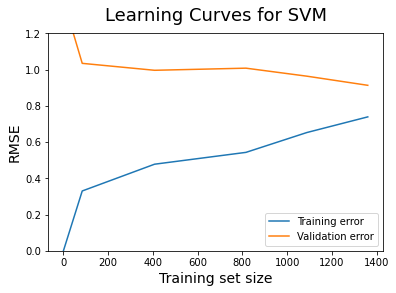

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for MAE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.2012 0.2721 0.3142 0.4049 0.4949]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.0819 0.7969 0.7418 0.7531 0.7288 0.694 ]
---------------------------------------------------------------------- 

Variance: 
 [1.0819 0.5957 0.4697 0.4389 0.3239 0.1991]
---------------------------------------------------------------------- 



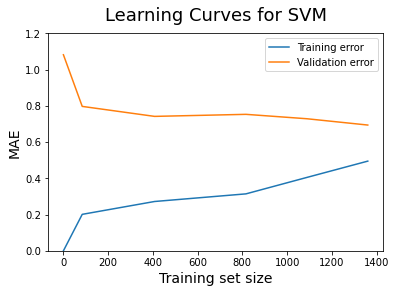

----------------------------------------------------------------------
----------------------------------------------------------------------


In [221]:
d3_variances = visual_mult_scores(day_three_df, d3_features)

In [222]:
d3_variances

[0.1742, 0.1991]

In [223]:
day_three_results['RMSE Variance'] = np.nan
day_three_results['MAE Variance'] = np.nan
admission_results['RMSE Variance'] = np.nan
admission_results['MAE Variance'] = np.nan

In [224]:
day_three_results

,RMSE,MAE,RMSE Variance,MAE Variance
KNeighbors Regression Holdout,0.9203,0.6924,NaN,NaN
Linear Regression Holdout,0.8404,0.6548,NaN,NaN
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366,NaN,NaN
"Linear Regression Cross Val, k=15",0.8883,0.7019,NaN,NaN
"Decision Tree, k=15",1.2401,0.8984,NaN,NaN
"Random Forest, k=15",0.9316,0.7223,NaN,NaN
"Multi-layer Perceptron, k=15",1.0278,0.8108,NaN,NaN
"SVR Cross Val, k=15",0.8939,0.6782,NaN,NaN
Random Forest tuned parameters,0.8972,0.7147,NaN,NaN
SVR tuned parameters,0.8831,0.6739,NaN,NaN


In [225]:
day_three_results.loc['SVR' + ' Cross Val, k=15']['RMSE Variance'] = d3_variances[0]
day_three_results.loc['SVR' + ' Cross Val, k=15']['MAE Variance'] = d3_variances[1]

In [226]:
day_three_results

,RMSE,MAE,RMSE Variance,MAE Variance
KNeighbors Regression Holdout,0.9203,0.6924,NaN,NaN
Linear Regression Holdout,0.8404,0.6548,NaN,NaN
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366,NaN,NaN
"Linear Regression Cross Val, k=15",0.8883,0.7019,NaN,NaN
"Decision Tree, k=15",1.2401,0.8984,NaN,NaN
"Random Forest, k=15",0.9316,0.7223,NaN,NaN
"Multi-layer Perceptron, k=15",1.0278,0.8108,NaN,NaN
"SVR Cross Val, k=15",0.8939,0.6782,0.1742,0.1991
Random Forest tuned parameters,0.8972,0.7147,NaN,NaN
SVR tuned parameters,0.8831,0.6739,NaN,NaN


## some notes on bias and variance

we see here we have a high validation error. This points to a bias problem.
The fact that this is combined with a low training error indicates that it is a low bias problem.
This means that the model fits the training data very well. 

takeaways: 
 - high validation error = bias problem
 - high validation error + low training error = low bias
 - high validation error + high training error = high bias

We also see a large gap between the training and validation sets. The size of this gap determines the variance. The smaller the gap, the less the variance, the larger, the more.

takeaways:
- as bias decreases, variance increases. 
- as bias increases, variance decreases.


this is a great resource for bias and variance. 
http://scott.fortmann-roe.com/docs/BiasVariance.html


this model currently suffers from low bias and high variance. the model is overfitting.
adding more instances is very likely to help because the training and validation errors haven't converged yet.

takeaways:
- making a model less complex increases the bias, decreases variance.
- making a model more complex decreases the bias, increases variance.

you can increase or decrease the number of features to adjust the bias variance relationship.
for this model, making it less complex would help increase the bias. 

ways to adjust complexity:
- using less features (less complex) 
- simpler algorithm hyperparameters (less complex)


## single model, tuned params

In [229]:
def visual_mult_scores_hypers(df, features):

    X = df[features]
    y = df[target]

    score_types = {'neg_root_mean_squared_error': 'RMSE', 'neg_mean_absolute_error': 'MAE'}
    
    # selecting the sizes of each training set
    length = len(df)
    train_sizes = [1, int(length*0.05), int(length*0.24), int(length*0.48), int(length*0.64), int(length*0.8)]
   
    variances = []

    for i in score_types:
        # obtaining the scores for training and validation sets
        train_sizes, train_scores, validation_scores = learning_curve(
            svr_best_params, X, y, train_sizes=train_sizes, scoring=i, cv=15)
        
        
        print('Scoring for', score_types[i] + ':', '\n')
        print('train sizes:', '\n', train_sizes)
        print('-' * 70, '\n')
#         print('train_scores:', '\n', '\n',train_scores, '\n')
#         print('-' * 70, '\n')
#         print('validation_scores:', '\n', '\n', validation_scores, '\n')
#         print('-' * 70, '\n')

        train_scores_mean = np.round(abs(train_scores).mean(axis=1), 4)
        validation_scores_mean = np.round(abs(validation_scores).mean(axis=1), 4)
        variance = np.round(abs(validation_scores_mean - train_scores_mean), 4)
        
        variances.append(variance[-1])

        print('Mean training scores:', '\n', train_scores_mean)
        print('-' * 70, '\n')
        print('Mean validation scores:', '\n', validation_scores_mean)
        print('-' * 70, '\n')
        print('Variance:', '\n', variance)
        print('-' * 70, '\n')
        
        # plotting the graph of fitness
        plt.plot(train_sizes, train_scores_mean, label = 'Training error')
        plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
        plt.ylabel(score_types[i], fontsize = 14)
        plt.xlabel('Training set size', fontsize = 14)
        plt.title('Learning Curves for SVM', fontsize = 18, y = 1.03)
        plt.legend()
        plt.ylim(0, 1.2)
        plt.show()
        print('-' * 70)
        print('-' * 70)
                
    return variances 


Scoring for RMSE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.4526 0.575  0.6123 0.7249 0.8031]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.3844 1.0612 1.0492 1.0385 0.9867 0.91  ]
---------------------------------------------------------------------- 

Variance: 
 [1.3844 0.6086 0.4742 0.4262 0.2618 0.1069]
---------------------------------------------------------------------- 



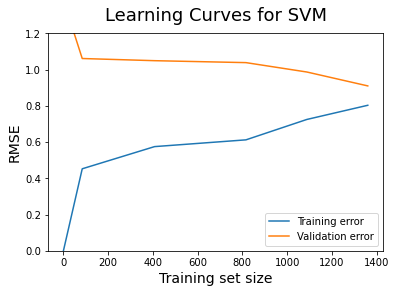

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for MAE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.2961 0.3353 0.3681 0.4683 0.5652]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.0819 0.8214 0.7936 0.7811 0.7535 0.7016]
---------------------------------------------------------------------- 

Variance: 
 [1.0819 0.5253 0.4583 0.413  0.2852 0.1364]
---------------------------------------------------------------------- 



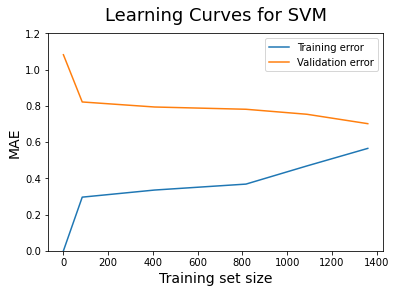

----------------------------------------------------------------------
----------------------------------------------------------------------


In [230]:
d3_svr_tuned_variances = visual_mult_scores_hypers(day_three_df, d3_features)

In [231]:
d3_svr_tuned_variances

[0.1069, 0.1364]

In [232]:
day_three_results.loc['SVR tuned parameters']['RMSE Variance'] = d3_svr_tuned_variances[0]
day_three_results.loc['SVR tuned parameters']['MAE Variance'] = d3_svr_tuned_variances[1]

In [233]:
day_three_results

,RMSE,MAE,RMSE Variance,MAE Variance
KNeighbors Regression Holdout,0.9203,0.6924,NaN,NaN
Linear Regression Holdout,0.8404,0.6548,NaN,NaN
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366,NaN,NaN
"Linear Regression Cross Val, k=15",0.8883,0.7019,NaN,NaN
"Decision Tree, k=15",1.2401,0.8984,NaN,NaN
"Random Forest, k=15",0.9316,0.7223,NaN,NaN
"Multi-layer Perceptron, k=15",1.0278,0.8108,NaN,NaN
"SVR Cross Val, k=15",0.8939,0.6782,0.1742,0.1991
Random Forest tuned parameters,0.8972,0.7147,NaN,NaN
SVR tuned parameters,0.8831,0.6739,0.1069,0.1364


We can see a much improved translation to new data by comparing the lower variance value in the tuned parameters version to the default parameters version

The only problem is: is that variance representative of the two scores next to it? Check to make sure the rmse and maae are originally being used in the same way as they are here. (train sizes at the final stage of 80% might give a different rmse?)

## multiple models, tuned params 

 - see if you can take the multiple model version and run it without tuned params as well, so we get variance data for before and after tuning

In [252]:
# all scoring types, all models, tuned

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import learning_curve

def visual_scores_hypers_models(df, features):
    
    X = df[features]
    y = df[target]
    
    models_dict={
        'SVR': SVR(C=0.2),
        'Random Forest': RandomForestRegressor(max_depth=8, min_samples_leaf=5, n_estimators=25,
                              random_state=1),
        'Multi-layer Perceptron': MLPRegressor(activation='identity', hidden_layer_sizes=(5, 5), max_iter=1000,
                             random_state=1)
        }


    score_types = {'neg_root_mean_squared_error': 'RMSE', 'neg_mean_absolute_error': 'MAE'}
    
    # selecting the sizes of each training set
    length = len(df)
    train_sizes = [1, int(length*0.05), int(length*0.24), int(length*0.48), int(length*0.64), int(length*0.8)]
   
    variances = []
    
    for m in models_dict:
        for i in score_types:
            # obtaining the scores for training and validation sets
            train_sizes, train_scores, validation_scores = learning_curve(
                models_dict[m], X, y, train_sizes=train_sizes, scoring=i, cv=15)


            print('Scoring for', m, score_types[i] + ':', '\n')
            print('train sizes:', '\n', train_sizes)
            print('-' * 70, '\n')
    #         print('train_scores:', '\n', '\n',train_scores, '\n')
    #         print('-' * 70, '\n')
    #         print('validation_scores:', '\n', '\n', validation_scores, '\n')
    #         print('-' * 70, '\n')

            train_scores_mean = np.round(abs(train_scores).mean(axis=1), 4)
            validation_scores_mean = np.round(abs(validation_scores).mean(axis=1), 4)
            variance = np.round(abs(validation_scores_mean - train_scores_mean), 4)

            variances.append(variance[-1])

            print('Mean training scores:', '\n', train_scores_mean)
            print('-' * 70, '\n')
            print('Mean validation scores:', '\n', validation_scores_mean)
            print('-' * 70, '\n')
            print('Variance:', '\n', variance)
            print('-' * 70, '\n')

            # plotting the graph of fitness
            plt.plot(train_sizes, train_scores_mean, label = 'Training error')
            plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
            plt.ylabel(score_types[i], fontsize = 14)
            plt.xlabel('Training set size', fontsize = 14)
            plt.title('Learning Curves for ' + m, fontsize = 18, y = 1.03)
            plt.legend()
            plt.ylim(0, 1.2)
            plt.show()
            print('-' * 70)
            print('-' * 70)
            
    pairwise_variances = [variances[i:i+2] for i in range(0, len(variances), 2)]

    return pairwise_variances


Scoring for SVR RMSE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.4526 0.575  0.6123 0.7249 0.8031]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.3844 1.0612 1.0492 1.0385 0.9867 0.91  ]
---------------------------------------------------------------------- 

Variance: 
 [1.3844 0.6086 0.4742 0.4262 0.2618 0.1069]
---------------------------------------------------------------------- 



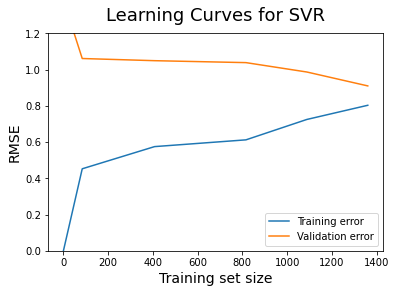

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for SVR MAE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.2961 0.3353 0.3681 0.4683 0.5652]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.0819 0.8214 0.7936 0.7811 0.7535 0.7016]
---------------------------------------------------------------------- 

Variance: 
 [1.0819 0.5253 0.4583 0.413  0.2852 0.1364]
---------------------------------------------------------------------- 



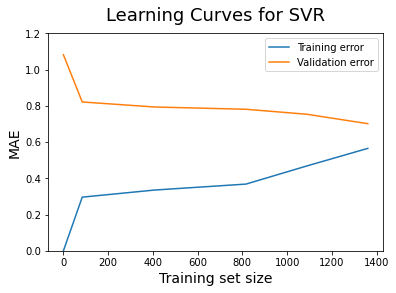

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for Random Forest RMSE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.3935 0.4951 0.5419 0.6525 0.7454]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.3844 1.0918 0.9841 0.9552 0.9322 0.9045]
---------------------------------------------------------------------- 

Variance: 
 [1.3844 0.6983 0.489  0.4133 0.2797 0.1591]
---------------------------------------------------------------------- 



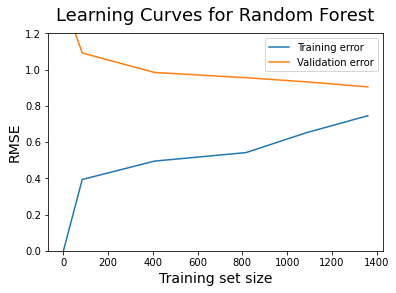

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for Random Forest MAE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.     0.2881 0.3635 0.4071 0.5138 0.5901]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.0819 0.8514 0.7654 0.7436 0.7416 0.7195]
---------------------------------------------------------------------- 

Variance: 
 [1.0819 0.5633 0.4019 0.3365 0.2278 0.1294]
---------------------------------------------------------------------- 



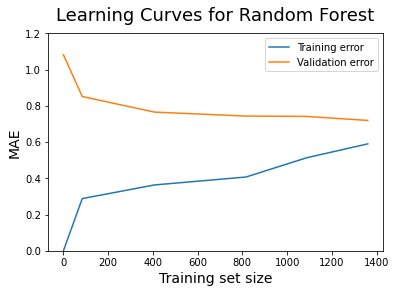

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for Multi-layer Perceptron RMSE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.1446 0.3319 0.5237 0.5806 0.6926 0.7924]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.3137 1.1509 0.9778 0.9525 0.9161 0.8788]
---------------------------------------------------------------------- 

Variance: 
 [1.1691 0.819  0.4541 0.3719 0.2235 0.0864]
---------------------------------------------------------------------- 



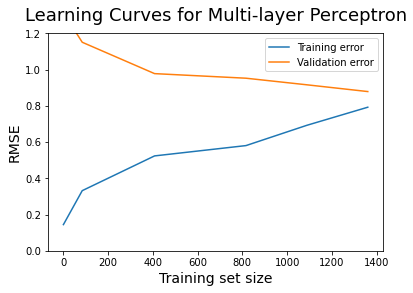

----------------------------------------------------------------------
----------------------------------------------------------------------
Scoring for Multi-layer Perceptron MAE: 

train sizes: 
 [   1   85  408  816 1088 1360]
---------------------------------------------------------------------- 

Mean training scores: 
 [0.1446 0.2417 0.3833 0.4193 0.5335 0.6126]
---------------------------------------------------------------------- 

Mean validation scores: 
 [1.065  0.8968 0.7521 0.7404 0.7267 0.6855]
---------------------------------------------------------------------- 

Variance: 
 [0.9204 0.6551 0.3688 0.3211 0.1932 0.0729]
---------------------------------------------------------------------- 



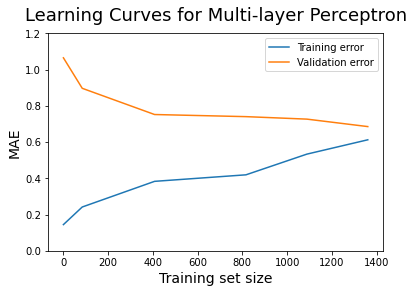

----------------------------------------------------------------------
----------------------------------------------------------------------


In [254]:
d3_tuned_variances = visual_scores_hypers_models(day_three_df, d3_features)

In [255]:
d3_tuned_variances

[[0.1069, 0.1364], [0.1591, 0.1294], [0.0864, 0.0729]]

In [256]:
day_three_results.loc['SVR tuned parameters']['RMSE Variance'] = d3_tuned_variances[0][0]
day_three_results.loc['SVR tuned parameters']['MAE Variance'] = d3_tuned_variances[0][1]
day_three_results.loc['Random Forest tuned parameters']['RMSE Variance'] = d3_tuned_variances[1][0]
day_three_results.loc['Random Forest tuned parameters']['MAE Variance'] = d3_tuned_variances[1][1]
day_three_results.loc['Multi-layer Perceptron tuned parameters']['RMSE Variance'] = d3_tuned_variances[2][0]
day_three_results.loc['Multi-layer Perceptron tuned parameters']['MAE Variance'] = d3_tuned_variances[2][1]

In [257]:
day_three_results

,RMSE,MAE,RMSE Variance,MAE Variance
KNeighbors Regression Holdout,0.9203,0.6924,NaN,NaN
Linear Regression Holdout,0.8404,0.6548,NaN,NaN
"KNeighbors Regression Cross Val, k=15",0.9471,0.7366,NaN,NaN
"Linear Regression Cross Val, k=15",0.8883,0.7019,NaN,NaN
"Decision Tree, k=15",1.2401,0.8984,NaN,NaN
"Random Forest, k=15",0.9316,0.7223,NaN,NaN
"Multi-layer Perceptron, k=15",1.0278,0.8108,NaN,NaN
"SVR Cross Val, k=15",0.8939,0.6782,0.1742,0.1991
Random Forest tuned parameters,0.8972,0.7147,0.1591,0.1294
SVR tuned parameters,0.8831,0.6739,0.1069,0.1364


Looks like the neural network is our winner here! using the identity function, which is JUST A LINEAR REGRESSION, we get the best combination of accurate predictions (determined by low RMSE and MAE) and translatability (determined by the low variance). 

Note that random forest, SVR, and MLP all give similar results, and all seem to still be able to benefit from increased sample sizes. This knowledge gives us the flexibility to use different models in the future, should we run into any computational limitations, without sacrificing too much predictive ability. 

Final steps:

1. is it a problem that the best model is a neural network identity function?
2. update both the day three and admissions df to reflect the best results
3. after you've shown how you can select the best possible performing model...create an easy function call 
    for that specific model
4. make this section more readable. explain what's going on.

<a id="Conclusion"></a>

# Conclusion

It seems as if the admission only data performs almost just as well as the third day data. Both can tell for a given patient what will happen to them better than with an accuracy of better than 1 complication (RMSE of about 0.92 complications for the admissions data, and RMSE of about 0.85 complications for the third day data).

comparing the admission against the third day will be a useful thing to say at the beginning as well.

### a helpful note on r2:


    The r2 score varies between 0 and 100%. It is closely related to the MSE (see below), but not the same. Wikipedia defines r2 as

” …the proportion of the variance in the dependent variable that is predictable from the independent variable(s).”

Another definition is “(total variance explained by model) / total variance.” So if it is 100%, the two variables are perfectly correlated, i.e., with no variance at all. A low value would show a low level of correlation, meaning a regression model that is not valid, but not in all cases.

# further steps

at some point it would be nice to show that, say you have accuracy within 0.4 complications, if you could clearly see a sample of some data being within 0.4 complications of ground truth data. 

if a classification problem seeks to assign a label to something, I could frame this as complication vs no complication
I could then make a multiclass classification problem by wondering which label it might recieve (as opposed to binary, which would just be the above example)

and if classification, would I still use rmse? or just use accuracy measures?

_answer: classification uses accuracy, and regression uses rmse, mse, etc_

right now I'm using regression because it seems appropriate to be assigning a complications number based on the target column having between 0 and 5 complications. 

could this same project be framed as both classification and regression? 

I believe regression is the right choice for this problem because we're interested in finding out how many complications a patient might have. this is more useful information that simply if they will have them or not. 


this is a helpful article: 
https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/

Here's a generally good idea for a workflow from the start:

1. rename the columns to get a good idea of the dataset and its data types and identify target
2. if categorical data exists, separate it out from the real
3. address missing values in some meaningful way (simple or iterative imputation)
4. if categorical, create dummy columns
5. if real, if there are many unique values, bin them
6. perform feature selection/engineering
7. modelling selection/tuning
